<a href="https://www.kaggle.com/code/abdalrhamnhebishy/insurance-classification?scriptVersionId=190306132" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
 h2 {
    font-size: var(--jp-content-font-size4);
    background-color: #5050dc;
    color: white;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 150px 70px 150px 70px;
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
        }
</style>
''')


## Dataset Description  :

  * The dataset for this competition was generated from a deep learning model trained on the Health Insurance Cross Sell  Prediction Data dataset.

  *  Feature distributions are close to, but not exactly the same, as the  original.

  *  Feel free to use the original dataset as part of this competition, both to explore differences as well as to see  whether incorporating the original  in     training improves model performance.
  
  *  Source of Data : This data loaded from kaggle .
         



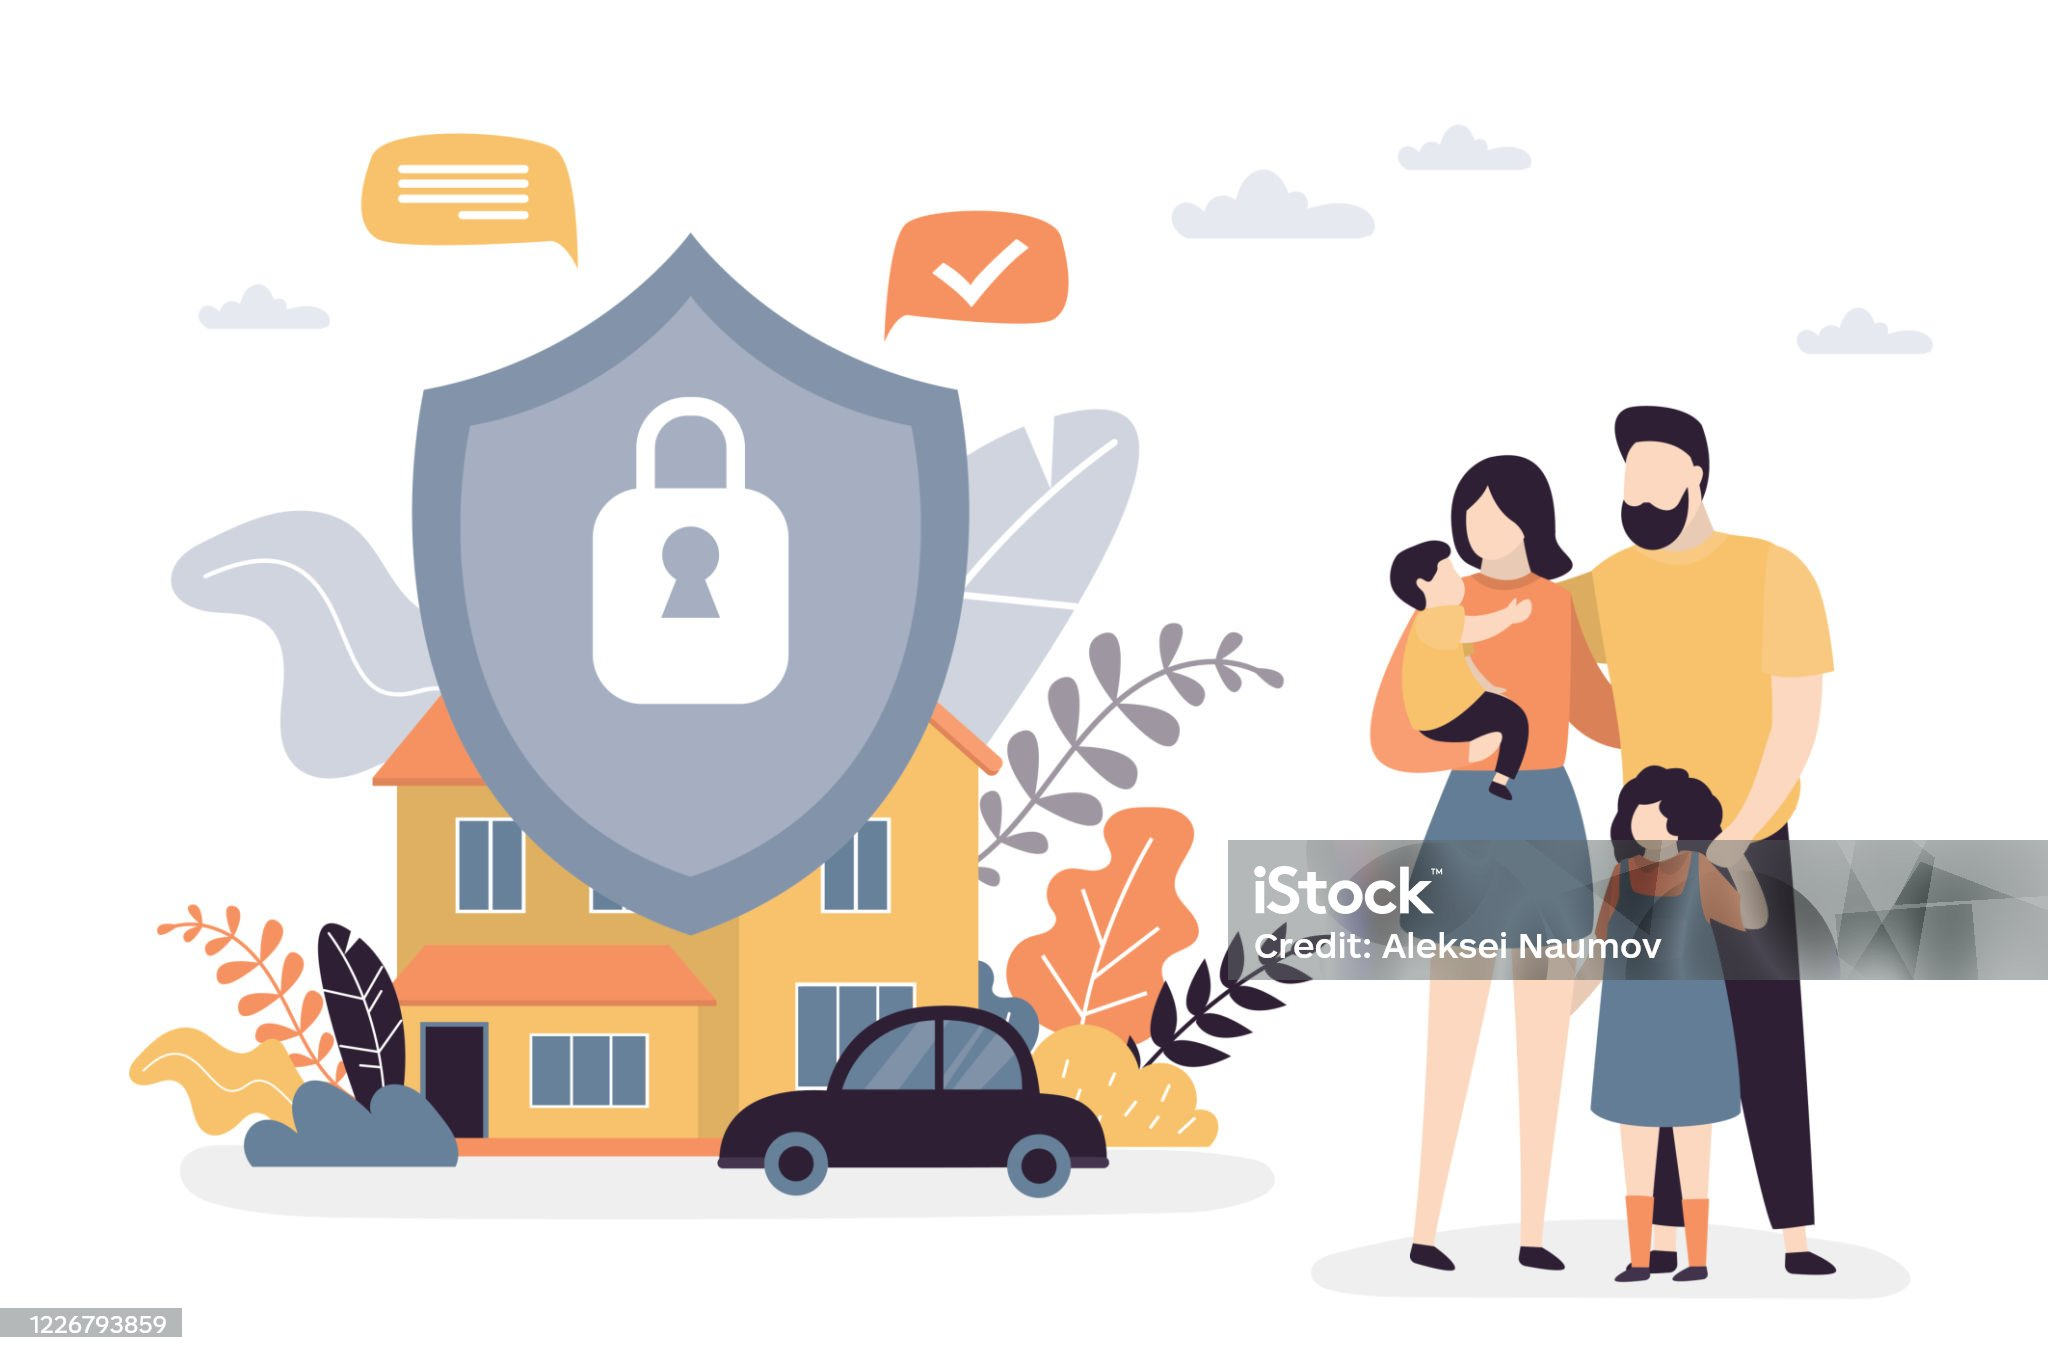

In [ ]:
# image 1:
from IPython.display import display ,Image
img1=Image("insure1.png")
display(img1)

## understanding the problem & Target :

  * problem : this problem consider as binary classification , we predict if

  
  * Solving Techniques : Traditional Machine leaarning models such as RandomForest , SupportVector , DecisionTree

     ,logisticRegression,naive_bayes Additional to Some Neural Network by using Tensorflow .
  
  
  * we will Make Some Analysis by using both pandas and sql , DataExplantory , Data cleaning , data processing ,

     data visualization , split and preparing data to bulding models .
  
  
  * Target: Response is the binary target

     * positive Response --->> 1
     
     * Negative Response --->> 0
           

## About dataset :

 this dataset consist from Response(target) and some features that affecting on it .



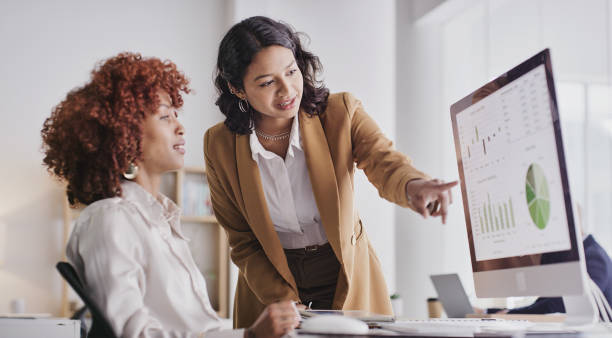

In [ ]:
# image2 :
img2=Image("insurance 2.jpg")
display(img2)


## Features Describtion :

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            |                                                                                       |
| Gender          | Detect the person type (Male or Femal)                                                                                        |
| Age                      | pearson Age                                                                                 |
| Driving_License           | Detect if have license or not (0,1)                                                                                          |
| Region_Code               | identify about the code of area                                                                                        |
| Previously_Insured        | Detect if the vehicle insurance before or not (0,1)                                                                                |
| Vehicle_Age               | Detect the Age of vechial                                                                                |
| Vehicle_Damage            | Detect if vehicle has damage or not  (0,1)                                                                           |
| Annual_Premium            | how much of Annunal in the year                                                                      |
| Policy_Sales_Channel      | to the method or channel through which an insurance policy is sold or distributed to the customer. In the context of insurance, sales channels                                                                                            |
| Vintage     | ventage vechial                                                                          |
| Response         | take positive or negative Response (1,0)                              |


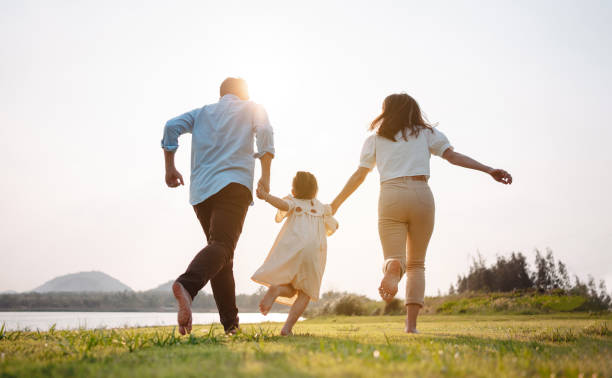

In [ ]:
# image3 :
img3=Image("insurance3.jpg")
display(img3)

## Part1 : Analysis  , preparing , cleaning , processing , visualization  Data  :

## pandas Analysis :

In [1]:
# imports :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix ,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
import sqlite3
import re
from IPython.display import display ,Image

In [ ]:
# load the data:

data=pd.read_csv("train.csv")
data.head(25)

In [ ]:
#get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))



<class 'pandas.core.frame.DataFrame'>

RangeIndex: 56804 entries, 0 to 56803

Data columns (total 12 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   id                    56804 non-null  int64  

 1   Gender                56804 non-null  object 

 2   Age                   56804 non-null  int64  

 3   Driving_License       56804 non-null  int64  

 4   Region_Code           56804 non-null  float64

 5   Previously_Insured    56804 non-null  int64  

 6   Vehicle_Age           56804 non-null  object 

 7   Vehicle_Damage        56804 non-null  object 

 8   Annual_Premium        56804 non-null  float64

 9   Policy_Sales_Channel  56804 non-null  float64

 10  Vintage               56804 non-null  int64  

 11  Response              56803 non-null  float64

dtypes: float64(4), int64(5), object(3)

memory usage: 5.2+ MB

None

-------------------------

shape of the dataset -->> (56804, 12)


In [ ]:
#get the statistical:
data.describe().T

count          mean           std     min       25%  \
id                    56804.0  28401.500000  16398.046682     0.0  14200.75   
Age                   56804.0     38.382896     15.036403    20.0     24.00   
Driving_License       56804.0      0.998134      0.043158     0.0      1.00   
Region_Code           56804.0     26.382103     13.022007     0.0     15.00   
Previously_Insured    56804.0      0.461024      0.498483     0.0      0.00   
Annual_Premium        56804.0  30381.341508  16211.636879  2630.0  25196.00   
Policy_Sales_Channel  56804.0    112.500158     54.008990     1.0     29.00   
Vintage               56804.0    164.210284     80.136558     2.0     98.00   
Response              56803.0      0.120962      0.326086     0.0      0.00   

                          50%       75%       max  
id                    28401.5  42602.25   56803.0  
Age                      36.0     49.00      83.0  
Driving_License           1.0      1.00       1.0  
Region_Code              28.0     35.00      52.0  
Previously_Insured        0.0      1.00       1.0  
Annual_Premium        31753.0  39447.25  319130.0  
Policy_Sales_Channel    151.0    152.00     163.0  
Vintage                 167.0    233.00     299.0  
Response                  0.0      0.00       1.0

In [ ]:
# get Types of data:

data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                float64
dtype: object

In [ ]:
#check if there null values in data:
# NO Found any null values :
data.isna().mean()

id                      0.000000
Gender                  0.000000
Age                     0.000000
Driving_License         0.000000
Region_Code             0.000000
Previously_Insured      0.000000
Vehicle_Age             0.000000
Vehicle_Damage          0.000000
Annual_Premium          0.000000
Policy_Sales_Channel    0.000000
Vintage                 0.000000
Response                0.000018
dtype: float64

In [ ]:
# know the number of every item in every column:

for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in id -->> 

 id

0        1

37874    1

37863    1

37864    1

37865    1

        ..

18937    1

18938    1

18939    1

18940    1

56803    1

Name: count, Length: 56804, dtype: int64

-------------------------

counts of items in Gender -->> 

 Gender

Male      30781

Female    26023

Name: count, dtype: int64

-------------------------

counts of items in Age -->> 

 Age

24    4072

23    3759

22    3276

25    3096

21    2482

      ... 

78     122

79      75

80      65

81       1

83       1

Name: count, Length: 63, dtype: int64

-------------------------

counts of items in Driving_License -->> 

 Driving_License

1    56698

0      106

Name: count, dtype: int64

-------------------------

counts of items in Region_Code -->> 

 Region_Code

28.0    16963

8.0      5041

46.0     2859

41.0     2705

15.0     1945

30.0     1766

29.0     1713

50.0     1506

11.0     1369

36.0     1283

3.0      1236

47.0     1137

33.0     1097

35.0      988

6

In [ ]:
# i will drop id column from dataset As it unless :
#Cleaning the dataset:
data=data.drop(columns="id",axis=1)
data.head(15)

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0     Male   21                1         35.0                   0    1-2 Year   
1     Male   43                1         28.0                   0   > 2 Years   
2   Female   25                1         14.0                   1    < 1 Year   
3   Female   35                1          1.0                   0    1-2 Year   
4   Female   36                1         15.0                   1    1-2 Year   
5   Female   31                1         47.0                   1    < 1 Year   
6     Male   23                1         45.0                   1    < 1 Year   
7   Female   47                1          8.0                   0    1-2 Year   
8   Female   26                1         28.0                   1    < 1 Year   
9   Female   66                1         11.0                   0    1-2 Year   
10    Male   22                1          3.0                   1    < 1 Year   
11  Female   25                1         10.0                   0    < 1 Year   
12    Male   36                1         28.0                   0    1-2 Year   
13    Male   27                1         28.0                   1    < 1 Year   
14  Female   24                1         12.0                   1    < 1 Year   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0             Yes         65101.0                 124.0      187       0.0  
1             Yes         58911.0                  26.0      288       1.0  
2              No         38043.0                 152.0      254       0.0  
3             Yes          2630.0                 156.0       76       0.0  
4              No         31951.0                 152.0      294       0.0  
5              No         28150.0                 152.0      197       0.0  
6              No         27128.0                 152.0      190       0.0  
7             Yes         40659.0                  26.0      262       1.0  
8              No         31639.0                 152.0       36       0.0  
9             Yes          2630.0                  26.0      125       0.0  
10             No         27996.0                 152.0      215       0.0  
11            Yes          2630.0                 152.0       30       0.0  
12            Yes         38104.0                  26.0      203       0.0  
13             No         43746.0                 152.0      259       0.0  
14             No         23692.0                 152.0      245       0.0

In [ ]:
# to know the uniques values in evey column in the dataset:
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>>Gender column  :  

['Male' 'Female']

**************************************************

All items in the ---->>>Age column  :  

[21 43 25 35 36 31 23 47 26 66 22 27 24 79 34 20 42 40 50 67 63 46 37 30

 53 32 28 58 48 59 52 39 44 33 41 57 51 45 68 74 29 49 55 61 60 65 54 38

 56 71 62 70 73 64 69 72 78 80 76 75 77 81 83]

**************************************************

All items in the ---->>>Driving_License column  :  

[1 0]

**************************************************

All items in the ---->>>Region_Code column  :  

[35. 28. 14.  1. 15. 47. 45.  8. 11.  3. 10. 12. 37. 50. 30. 46. 29. 16.

 26. 25. 41. 48.  7.  4. 24. 36. 33.  2.  9. 27. 18. 43. 49. 17. 13. 38.

  6. 21. 23.  0. 19.  5. 39. 44. 20. 40. 22. 32. 42. 31. 34. 51. 52.]

**************************************************

All items in the ---->>>Previously_Insured column  :  

[0 1]

**************************************************

All items in the ---->>>Vehicle_Age column  :  



In [ ]:
# clean the columns of the dataset from precentage sign % or _ if found  :
# Remove special characters from column names
data.columns = data.columns.str.replace('[^A-Za-z0-9_]', '', regex=True) # this mean that will Remove all characters except the characters and Numbers :
data

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0        Male   21                1         35.0                   0   
1        Male   43                1         28.0                   0   
2      Female   25                1         14.0                   1   
3      Female   35                1          1.0                   0   
4      Female   36                1         15.0                   1   
...       ...  ...              ...          ...                 ...   
56799  Female   24                1          9.0                   0   
56800  Female   42                1         50.0                   0   
56801  Female   26                1         25.0                   1   
56802  Female   73                1         14.0                   0   
56803    Male   46                1         46.0                   0   

      Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        1-2 Year            Yes         65101.0                 124.0   
1       > 2 Years            Yes         58911.0                  26.0   
2        < 1 Year             No         38043.0                 152.0   
3        1-2 Year            Yes          2630.0                 156.0   
4        1-2 Year             No         31951.0                 152.0   
...           ...            ...             ...                   ...   
56799    < 1 Year            Yes         28173.0                 152.0   
56800    1-2 Year            Yes         54955.0                   8.0   
56801    < 1 Year             No         29960.0                 152.0   
56802    1-2 Year            Yes          2630.0                 124.0   
56803    1-2 Year            Yes         34451.0                 124.0   

       Vintage  Response  
0          187       0.0  
1          288       1.0  
2          254       0.0  
3           76       0.0  
4          294       0.0  
...        ...       ...  
56799      160       0.0  
56800      270       0.0  
56801      126       0.0  
56802      194       1.0  
56803        2       NaN  

[56804 rows x 11 columns]

In [ ]:
# cleaning the dataset :
for col in data.columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0        Male   21                1         35.0                   0   
1        Male   43                1         28.0                   0   
2      Female   25                1         14.0                   1   
3      Female   35                1          1.0                   0   
4      Female   36                1         15.0                   1   
...       ...  ...              ...          ...                 ...   
56799  Female   24                1          9.0                   0   
56800  Female   42                1         50.0                   0   
56801  Female   26                1         25.0                   1   
56802  Female   73                1         14.0                   0   
56803    Male   46                1         46.0                   0   

      Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        1-2 Year            Yes         65101.0                 124.0   
1       > 2 Years            Yes         58911.0                  26.0   
2        < 1 Year             No         38043.0                 152.0   
3        1-2 Year            Yes          2630.0                 156.0   
4        1-2 Year             No         31951.0                 152.0   
...           ...            ...             ...                   ...   
56799    < 1 Year            Yes         28173.0                 152.0   
56800    1-2 Year            Yes         54955.0                   8.0   
56801    < 1 Year             No         29960.0                 152.0   
56802    1-2 Year            Yes          2630.0                 124.0   
56803    1-2 Year            Yes         34451.0                 124.0   

       Vintage  Response  
0          187       0.0  
1          288       1.0  
2          254       0.0  
3           76       0.0  
4          294       0.0  
...        ...       ...  
56799      160       0.0  
56800      270       0.0  
56801      126       0.0  
56802      194       1.0  
56803        2       0.0  

[56804 rows x 11 columns]

In [ ]:
data.isna().mean()

Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [ ]:
# Use the replace method with a regular expression to remove > and < characters
data['Vehicle_Age'] = data['Vehicle_Age'].replace(to_replace='>', value="bigger_than_", regex=True)
data['Vehicle_Age'] = data['Vehicle_Age'].replace(to_replace='<', value="smaller_than_", regex=True)
data.head(10)

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0    Male   21                1         35.0                   0   
1    Male   43                1         28.0                   0   
2  Female   25                1         14.0                   1   
3  Female   35                1          1.0                   0   
4  Female   36                1         15.0                   1   
5  Female   31                1         47.0                   1   
6    Male   23                1         45.0                   1   
7  Female   47                1          8.0                   0   
8  Female   26                1         28.0                   1   
9  Female   66                1         11.0                   0   

            Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0              1-2 Year            Yes         65101.0                 124.0   
1  bigger_than_ 2 Years            Yes         58911.0                  26.0   
2  smaller_than_ 1 Year             No         38043.0                 152.0   
3              1-2 Year            Yes          2630.0                 156.0   
4              1-2 Year             No         31951.0                 152.0   
5  smaller_than_ 1 Year             No         28150.0                 152.0   
6  smaller_than_ 1 Year             No         27128.0                 152.0   
7              1-2 Year            Yes         40659.0                  26.0   
8  smaller_than_ 1 Year             No         31639.0                 152.0   
9              1-2 Year            Yes          2630.0                  26.0   

   Vintage  Response  
0      187       0.0  
1      288       1.0  
2      254       0.0  
3       76       0.0  
4      294       0.0  
5      197       0.0  
6      190       0.0  
7      262       1.0  
8       36       0.0  
9      125       0.0

## Data Explantory by using pandas :

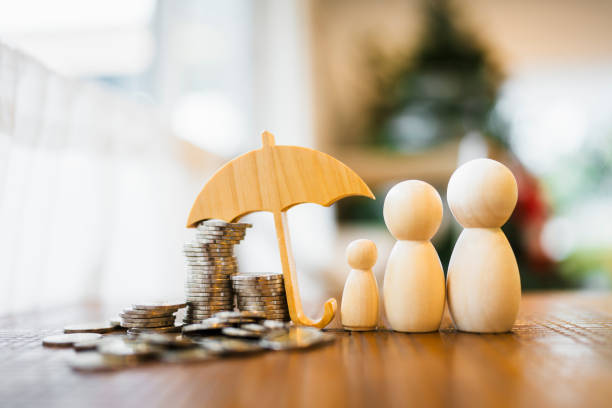

In [ ]:
# image4 :
img4=Image("insurance4.jpg")
display(img4)

In [ ]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns

    num_cols=data.select_dtypes("number").columns

    disc_cols=data.select_dtypes(include=("int64")).columns

    conts_cols=data.select_dtypes(include=("float64")).columns

    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

 Numerical_columns ----->>> Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',

       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],

      dtype='object') 

 Discrete_columns ---->>> Index(['Age', 'Driving_License', 'Previously_Insured', 'Vintage'], dtype='object') 

 Continous_cols ----->> Index(['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Response'], dtype='object') 

 Nominal Columns --->> Gender                2

Driving_License       2

Previously_Insured    2

Vehicle_Damage        2

Response              2

dtype: int64


In [ ]:
# Describe object :
data.describe(include="O").T

count unique       top   freq
Gender          56804      2      Male  30781
Vehicle_Age     56804      3  1-2 Year  29554
Vehicle_Damage  56804      2       Yes  28613

## sql Analysis :

In [ ]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('insurance.db')

# Create a cursor object
cursor = conn.cursor()

# Check if the table 'insurance1' exists
cursor.execute("""
SELECT * FROM sqlite_master WHERE type='table' AND name='insurance1';
""")
table_exists = cursor.fetchone()

# Create the table only if it does not exist
if not table_exists:
    # Assuming 'data' is your pandas DataFrame
    data.to_sql("insurance1", conn, if_exists='fail')  # 'fail' will raise a ValueError if the table already exists
else:
    print("The table 'insurance1' already exists. Skipping table creation.")







In [ ]:
df1 = pd.read_sql("SELECT * FROM insurance1", conn)
df1

index  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0          0    Male   21                1         35.0                   0   
1          1    Male   43                1         28.0                   0   
2          2  Female   25                1         14.0                   1   
3          3  Female   35                1          1.0                   0   
4          4  Female   36                1         15.0                   1   
...      ...     ...  ...              ...          ...                 ...   
56799  56799  Female   24                1          9.0                   0   
56800  56800  Female   42                1         50.0                   0   
56801  56801  Female   26                1         25.0                   1   
56802  56802  Female   73                1         14.0                   0   
56803  56803    Male   46                1         46.0                   0   

                Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                  1-2 Year            Yes         65101.0   
1      bigger_than_ 2 Years            Yes         58911.0   
2      smaller_than_ 1 Year             No         38043.0   
3                  1-2 Year            Yes          2630.0   
4                  1-2 Year             No         31951.0   
...                     ...            ...             ...   
56799  smaller_than_ 1 Year            Yes         28173.0   
56800              1-2 Year            Yes         54955.0   
56801  smaller_than_ 1 Year             No         29960.0   
56802              1-2 Year            Yes          2630.0   
56803              1-2 Year            Yes         34451.0   

       Policy_Sales_Channel  Vintage  Response  
0                     124.0      187       0.0  
1                      26.0      288       1.0  
2                     152.0      254       0.0  
3                     156.0       76       0.0  
4                     152.0      294       0.0  
...                     ...      ...       ...  
56799                 152.0      160       0.0  
56800                   8.0      270       0.0  
56801                 152.0      126       0.0  
56802                 124.0      194       1.0  
56803                 124.0        2       0.0  

[56804 rows x 12 columns]

In [ ]:
# clean the table :
# feature index is not important :

df1.drop(columns="index",axis=1)


Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0        Male   21                1         35.0                   0   
1        Male   43                1         28.0                   0   
2      Female   25                1         14.0                   1   
3      Female   35                1          1.0                   0   
4      Female   36                1         15.0                   1   
...       ...  ...              ...          ...                 ...   
56799  Female   24                1          9.0                   0   
56800  Female   42                1         50.0                   0   
56801  Female   26                1         25.0                   1   
56802  Female   73                1         14.0                   0   
56803    Male   46                1         46.0                   0   

                Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                  1-2 Year            Yes         65101.0   
1      bigger_than_ 2 Years            Yes         58911.0   
2      smaller_than_ 1 Year             No         38043.0   
3                  1-2 Year            Yes          2630.0   
4                  1-2 Year             No         31951.0   
...                     ...            ...             ...   
56799  smaller_than_ 1 Year            Yes         28173.0   
56800              1-2 Year            Yes         54955.0   
56801  smaller_than_ 1 Year             No         29960.0   
56802              1-2 Year            Yes          2630.0   
56803              1-2 Year            Yes         34451.0   

       Policy_Sales_Channel  Vintage  Response  
0                     124.0      187       0.0  
1                      26.0      288       1.0  
2                     152.0      254       0.0  
3                     156.0       76       0.0  
4                     152.0      294       0.0  
...                     ...      ...       ...  
56799                 152.0      160       0.0  
56800                   8.0      270       0.0  
56801                 152.0      126       0.0  
56802                 124.0      194       1.0  
56803                 124.0        2       0.0  

[56804 rows x 11 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 56804 entries, 0 to 56803

Data columns (total 12 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   index                 56804 non-null  int64  

 1   Gender                56804 non-null  object 

 2   Age                   56804 non-null  int64  

 3   Driving_License       56804 non-null  int64  

 4   Region_Code           56804 non-null  float64

 5   Previously_Insured    56804 non-null  int64  

 6   Vehicle_Age           56804 non-null  object 

 7   Vehicle_Damage        56804 non-null  object 

 8   Annual_Premium        56804 non-null  float64

 9   Policy_Sales_Channel  56804 non-null  float64

 10  Vintage               56804 non-null  int64  

 11  Response              56804 non-null  float64

dtypes: float64(4), int64(5), object(3)

memory usage: 5.2+ MB


In [ ]:
df1.describe().T

count          mean           std     min       25%  \
index                 56804.0  28401.500000  16398.046682     0.0  14200.75   
Age                   56804.0     38.382896     15.036403    20.0     24.00   
Driving_License       56804.0      0.998134      0.043158     0.0      1.00   
Region_Code           56804.0     26.382103     13.022007     0.0     15.00   
Previously_Insured    56804.0      0.461024      0.498483     0.0      0.00   
Annual_Premium        56804.0  30381.341508  16211.636879  2630.0  25196.00   
Policy_Sales_Channel  56804.0    112.500158     54.008990     1.0     29.00   
Vintage               56804.0    164.210284     80.136558     2.0     98.00   
Response              56804.0      0.120960      0.326083     0.0      0.00   

                          50%       75%       max  
index                 28401.5  42602.25   56803.0  
Age                      36.0     49.00      83.0  
Driving_License           1.0      1.00       1.0  
Region_Code              28.0     35.00      52.0  
Previously_Insured        0.0      1.00       1.0  
Annual_Premium        31753.0  39447.25  319130.0  
Policy_Sales_Channel    151.0    152.00     163.0  
Vintage                 167.0    233.00     299.0  
Response                  0.0      0.00       1.0

In [ ]:
# check null_values :
df1.isna().sum()

index                   0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Data Explantory by using sqlite3:

In [ ]:
# Q1:TO Number man whos has a linces :

print("=== Number OF MENS whos has a license === ")
R1=cursor.execute("SELECT GENDER,COUNT(GENDER),DRIVING_LICENSE FROM INSURANCE1  WHERE   GENDER='Male' AND DRIVING_LICENSE='1'")
R1.fetchall()

=== Number OF MENS whos has a license === 


[('Male', 30692, 1)]

In [ ]:
# Q2:TO Number womens whos has a linces :

print(" === Number OF WOMENS whos has a license ===")
R2=cursor.execute("SELECT GENDER,COUNT(GENDER),DRIVING_LICENSE FROM INSURANCE1  WHERE   GENDER='Female' AND DRIVING_LICENSE='1'")
R2.fetchall()

 === Number OF WOMENS whos has a license ===


[('Female', 26006, 1)]

In [ ]:
# Q3:TO Number sum Womens :

print("=== sum of womens === ")
R3=cursor.execute("SELECT GENDER,COUNT(GENDER) FROM INSURANCE1  WHERE   GENDER='Female' ")
R3.fetchall()

=== sum of womens === 


[('Female', 26023)]

In [ ]:
# Q4:to Number sum mens: :

print(" ===sum of mens ===")
R4=cursor.execute("SELECT GENDER,COUNT(GENDER) FROM INSURANCE1  WHERE   GENDER='Male' ")
R4.fetchall()

 ===sum of mens ===


[('Male', 30781)]

In [ ]:
# Q5 : to know sum pepole whose have a DRIVING LICENSE :

print(" ===sum of pepole has a driving license === ")
R5=cursor.execute("SELECT SUM(DRIVING_LICENSE) FROM INSURANCE1  WHERE   DRIVING_LICENSE='1'")
R5.fetchall()

 ===sum of pepole has a driving license === 


[(56698,)]

In [ ]:
# Q6 : to know sum pepole whose have not a DRIVING LICENSE :

print("=== sum of pepole has not a driving license ===")
R6=cursor.execute("SELECT SUM(DRIVING_LICENSE) FROM INSURANCE1  WHERE   DRIVING_LICENSE=0")
R6.fetchall()

=== sum of pepole has not a driving license ===


[(0,)]

In [ ]:
#Q7 : if i want to see Number of mens whose Age between 25 ,60 :

print(" === Number OF mens whos Age between 25 and  60 years ====")
R7=cursor.execute("SELECT COUNT(GENDER) FROM INSURANCE1  WHERE   GENDER='Male' AND AGE between 25 AND 60 ")
R7.fetchall()



 === Number OF mens whos Age between 25 and  60 years ====


[(20919,)]

In [ ]:
#Q8 : if i want to see Number of womens whose Age between 25 ,50 :

print(" === Number OF womens whos Age between 25 and  50 years ====")
R8=cursor.execute("SELECT COUNT(GENDER) FROM INSURANCE1  WHERE   GENDER='Female' AND AGE between 25 AND 50 ")
R8.fetchall()

 === Number OF womens whos Age between 25 and  50 years ====


[(13400,)]

In [ ]:
# Q9 : if i want to know number of Previously_Insured :

print("===  Number OF PREVIOUSLY_INSURED for Vehicle  ===")
R9=cursor.execute("SELECT SUM(PREVIOUSLY_INSURED) FROM INSURANCE1 WHERE PREVIOUSLY_INSURED='1' ")
R9.fetchall()

===  Number OF PREVIOUSLY_INSURED for Vehicle  ===


[(26188,)]

In [ ]:
# Q10 : if i want to know Number of Vehicle_Damage that not PREVIOUSLY_INSURED :

print("=== Number of Vehicle_Damage that Not PREVIOUSLY_INSURED ===")
R10=cursor.execute("SELECT COUNT(Vehicle_Damage) FROM INSURANCE1 WHERE PREVIOUSLY_INSURED='0' AND Vehicle_Damage='Yes'")
R10.fetchall()

=== Number of Vehicle_Damage that Not PREVIOUSLY_INSURED ===


[(27301,)]

In [ ]:
# Q11 : if i wnt to know Nuber of PREVIOUSLY_INSURED and Vehicle_Age 1-2 years :

print("=== Number of PREVIOUSLY_INSURED that Vehicle_Age 1-2 years ===")
R11=cursor.execute("SELECT COUNT(PREVIOUSLY_INSURED) FROM INSURANCE1 WHERE PREVIOUSLY_INSURED='1' AND Vehicle_Age='1-2 Year'")
R11.fetchall()


=== Number of PREVIOUSLY_INSURED that Vehicle_Age 1-2 years ===


[(9343,)]

In [ ]:
# Q12 :if i want Number of positive Response and Negative Response :

print("=== Number of positive Response ,PREVIOUSLY_INSURED and 1-2 Year ===")
R12=cursor.execute("SELECT COUNT(Response) FROM INSURANCE1 WHERE PREVIOUSLY_INSURED='1' AND Vehicle_Age='1-2 Year'")
R12.fetchall()


=== Number of positive Response ,PREVIOUSLY_INSURED and 1-2 Year ===


[(9343,)]

In [ ]:
# close cursor & connection to Database :
cursor.close()
conn.close()

## Visualization the Dataset

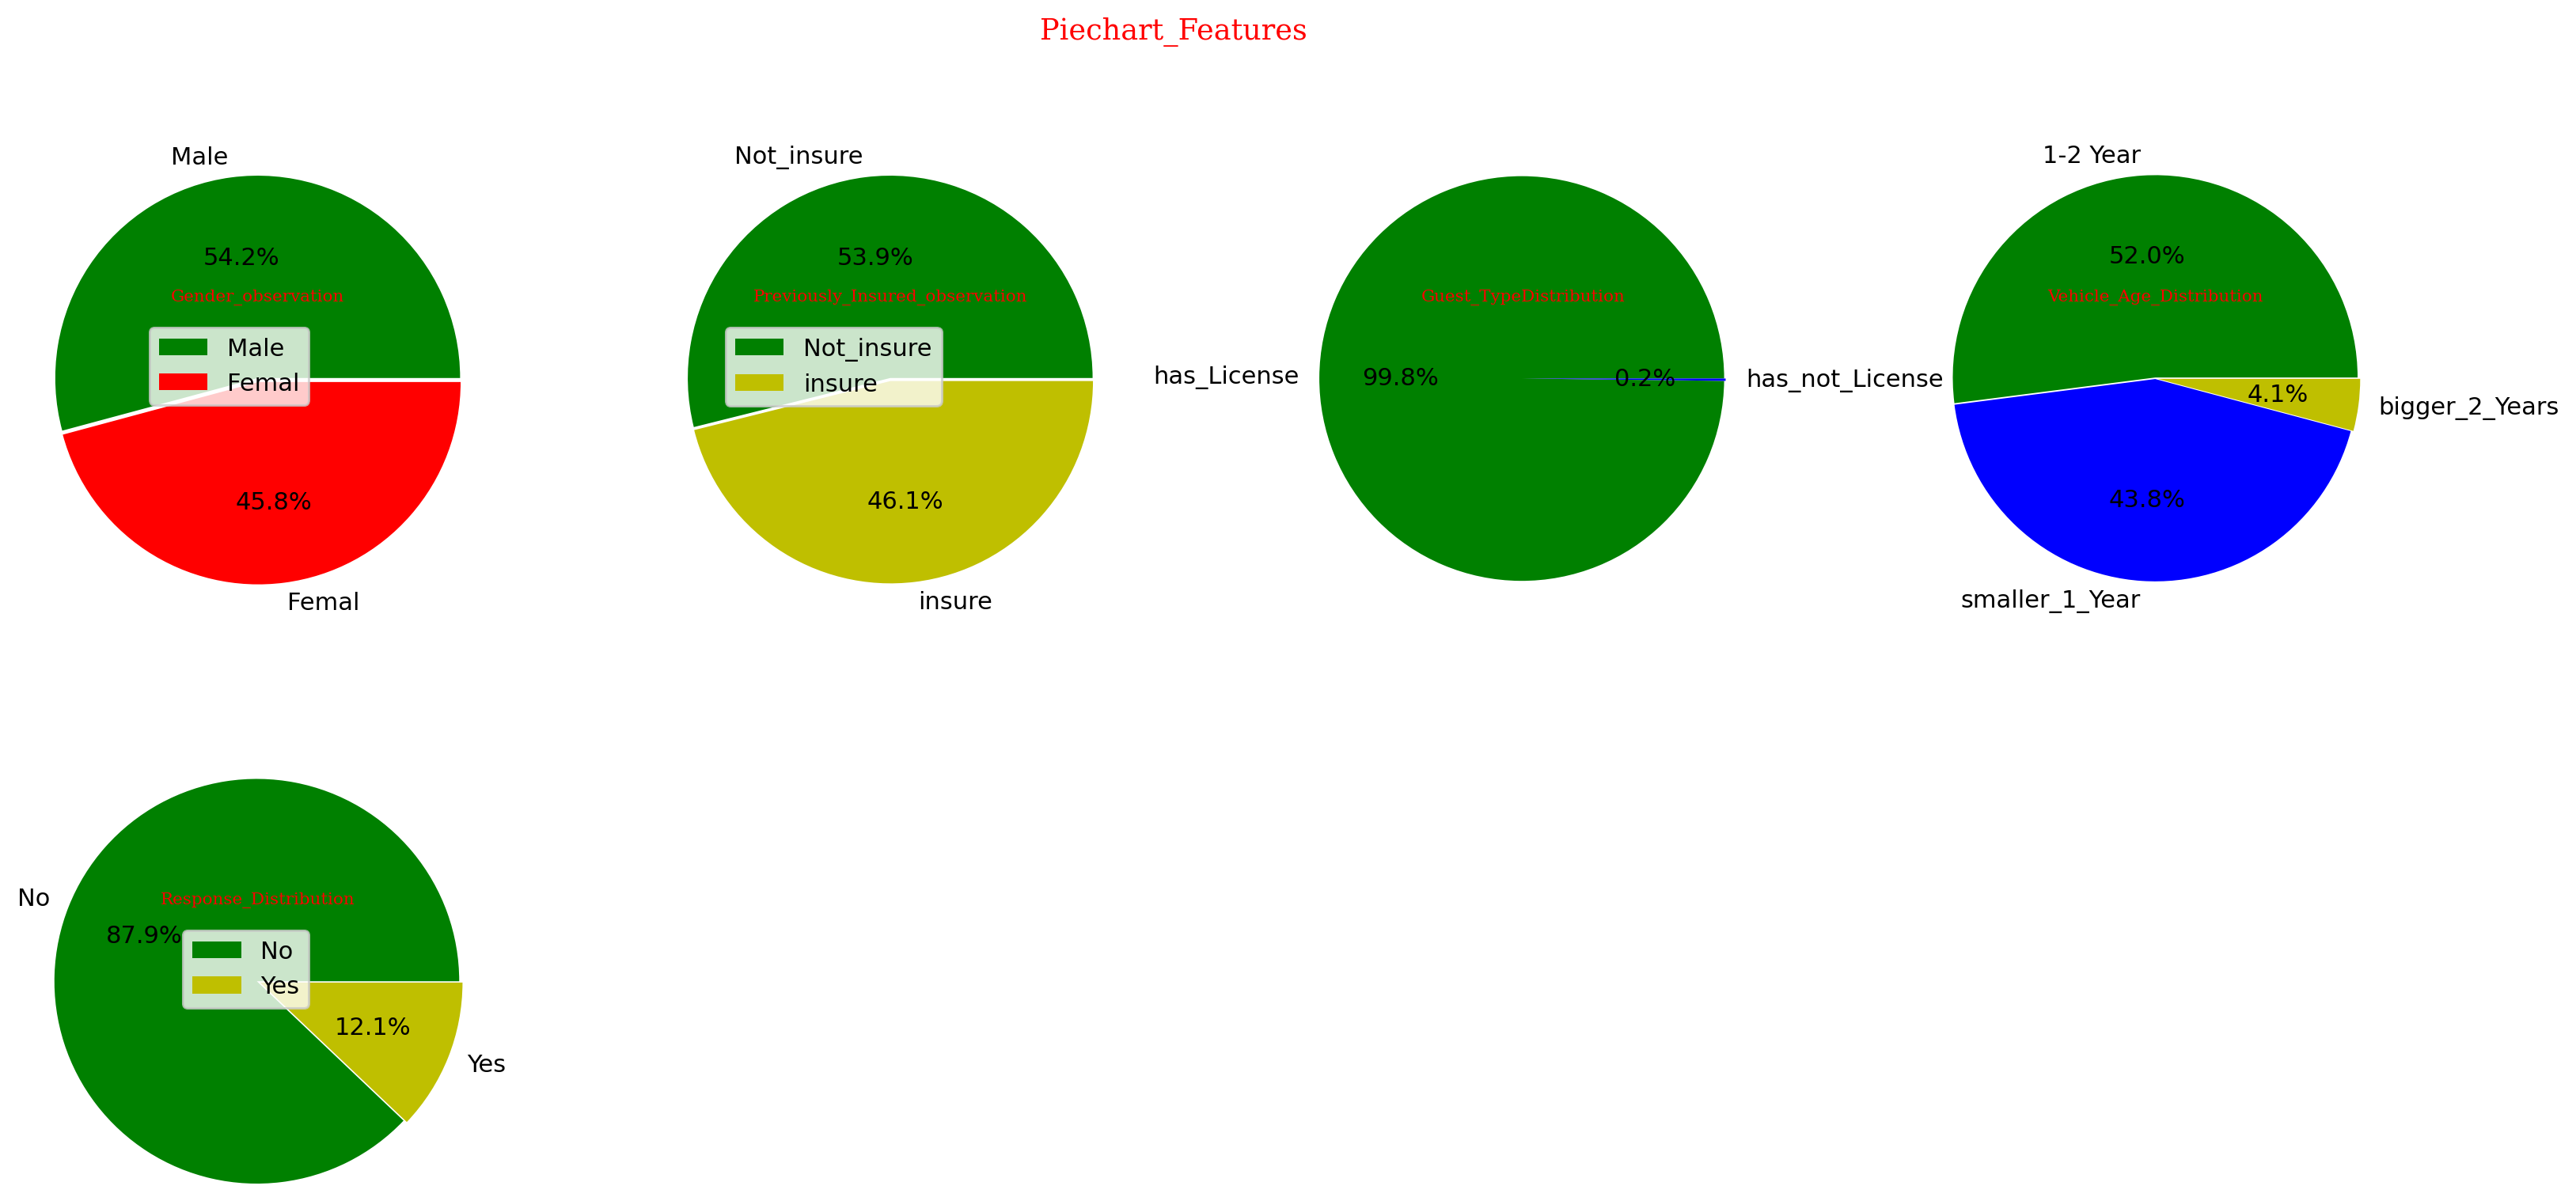

In [ ]:
# Font style for titles
f1 = {"family": "serif", "size": 7, "color": "r"}

# Create a figure with a specified size and DPI
plt.figure(figsize=(15, 15), dpi=220)
plt.suptitle("Piechart_Features",fontdict=f1)

# Plot 1
Gender = data["Gender"].value_counts()
plt.subplot(4, 4, 1)  # Create the first subplot
plt.title("Gender_observation", fontdict=f1)
plt.pie(
    x=Gender,
    labels=["Male", "Femal"],
    colors=["g","r"],
    explode=[0.01, 0.07],
    autopct='%1.1f%%',
    radius=4,
)

plt.legend()


# Plot 2

Previously_Insured = data["Previously_Insured"].value_counts()
plt.subplot(4, 4, 2)  # Create the second subplot
plt.title("Previously_Insured_observation", fontdict=f1)
plt.pie(
    x=Previously_Insured,
    labels=["Not_insure", "insure"],
    colors=["g","y"],
    explode=[0.01, 0.05],
    autopct='%1.1f%%',
    radius=4,
)
plt.legend()
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=2,hspace=1)


#plot3:

# to observe how many of the Driving_License :

plt.subplot(4,4,3)
Driving_License=data["Driving_License"].value_counts()
plt.pie(x=Driving_License,labels=["has_License","has_not_License"],colors=["g","b"],explode=[0.02,0.01],autopct='%1.1f%%',radius=4)
plt.title("Guest_TypeDistribution",fontdict=f1)


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=4,hspace=1)


#plot4:

# to observe how many of the Vehicle_Age :

plt.subplot(4,4,4)
Vehicle_Age=data["Vehicle_Age"].value_counts()
plt.pie(x=Vehicle_Age,labels=["1-2 Year","smaller_1_Year","bigger_2_Years"],colors=["g","b","y"],explode=[0.02,0.01,0.05],autopct='%1.1f%%',radius=4)
plt.title("Vehicle_Age_Distribution",fontdict=f1)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=4,hspace=1)


#plot5:

# to observe how many of the Response :

plt.subplot(4,4,5)
Response=data["Response"].value_counts()
plt.pie(x=Response,labels=["No","Yes"],colors=["g","y"],explode=[0.02,0.05],autopct='%1.1f%%',radius=4)
plt.title("Response_Distribution",fontdict=f1)
plt.legend()
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=2)
plt.show()


In [ ]:
!pip install pywaffle





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 35.1 MB/s eta 0:00:00















In [ ]:
! pip install Waffle



  Preparing metadata (setup.py) ... done






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.9 MB/s eta 0:00:00



  Created wheel for Waffle: filename=waffle-0.5.0-py3-none-any.whl size=16512 sha256=c7a9441441b278a82cff1341f501c0364eb574a2700b0ac89caf9b963594489d

  Stored in directory: /root/.cache/pip/wheels/49/81/51/88aedf28aaf857bf03efcb70a30fbcf2140032ace1f83e3514

Successfully built Waffle




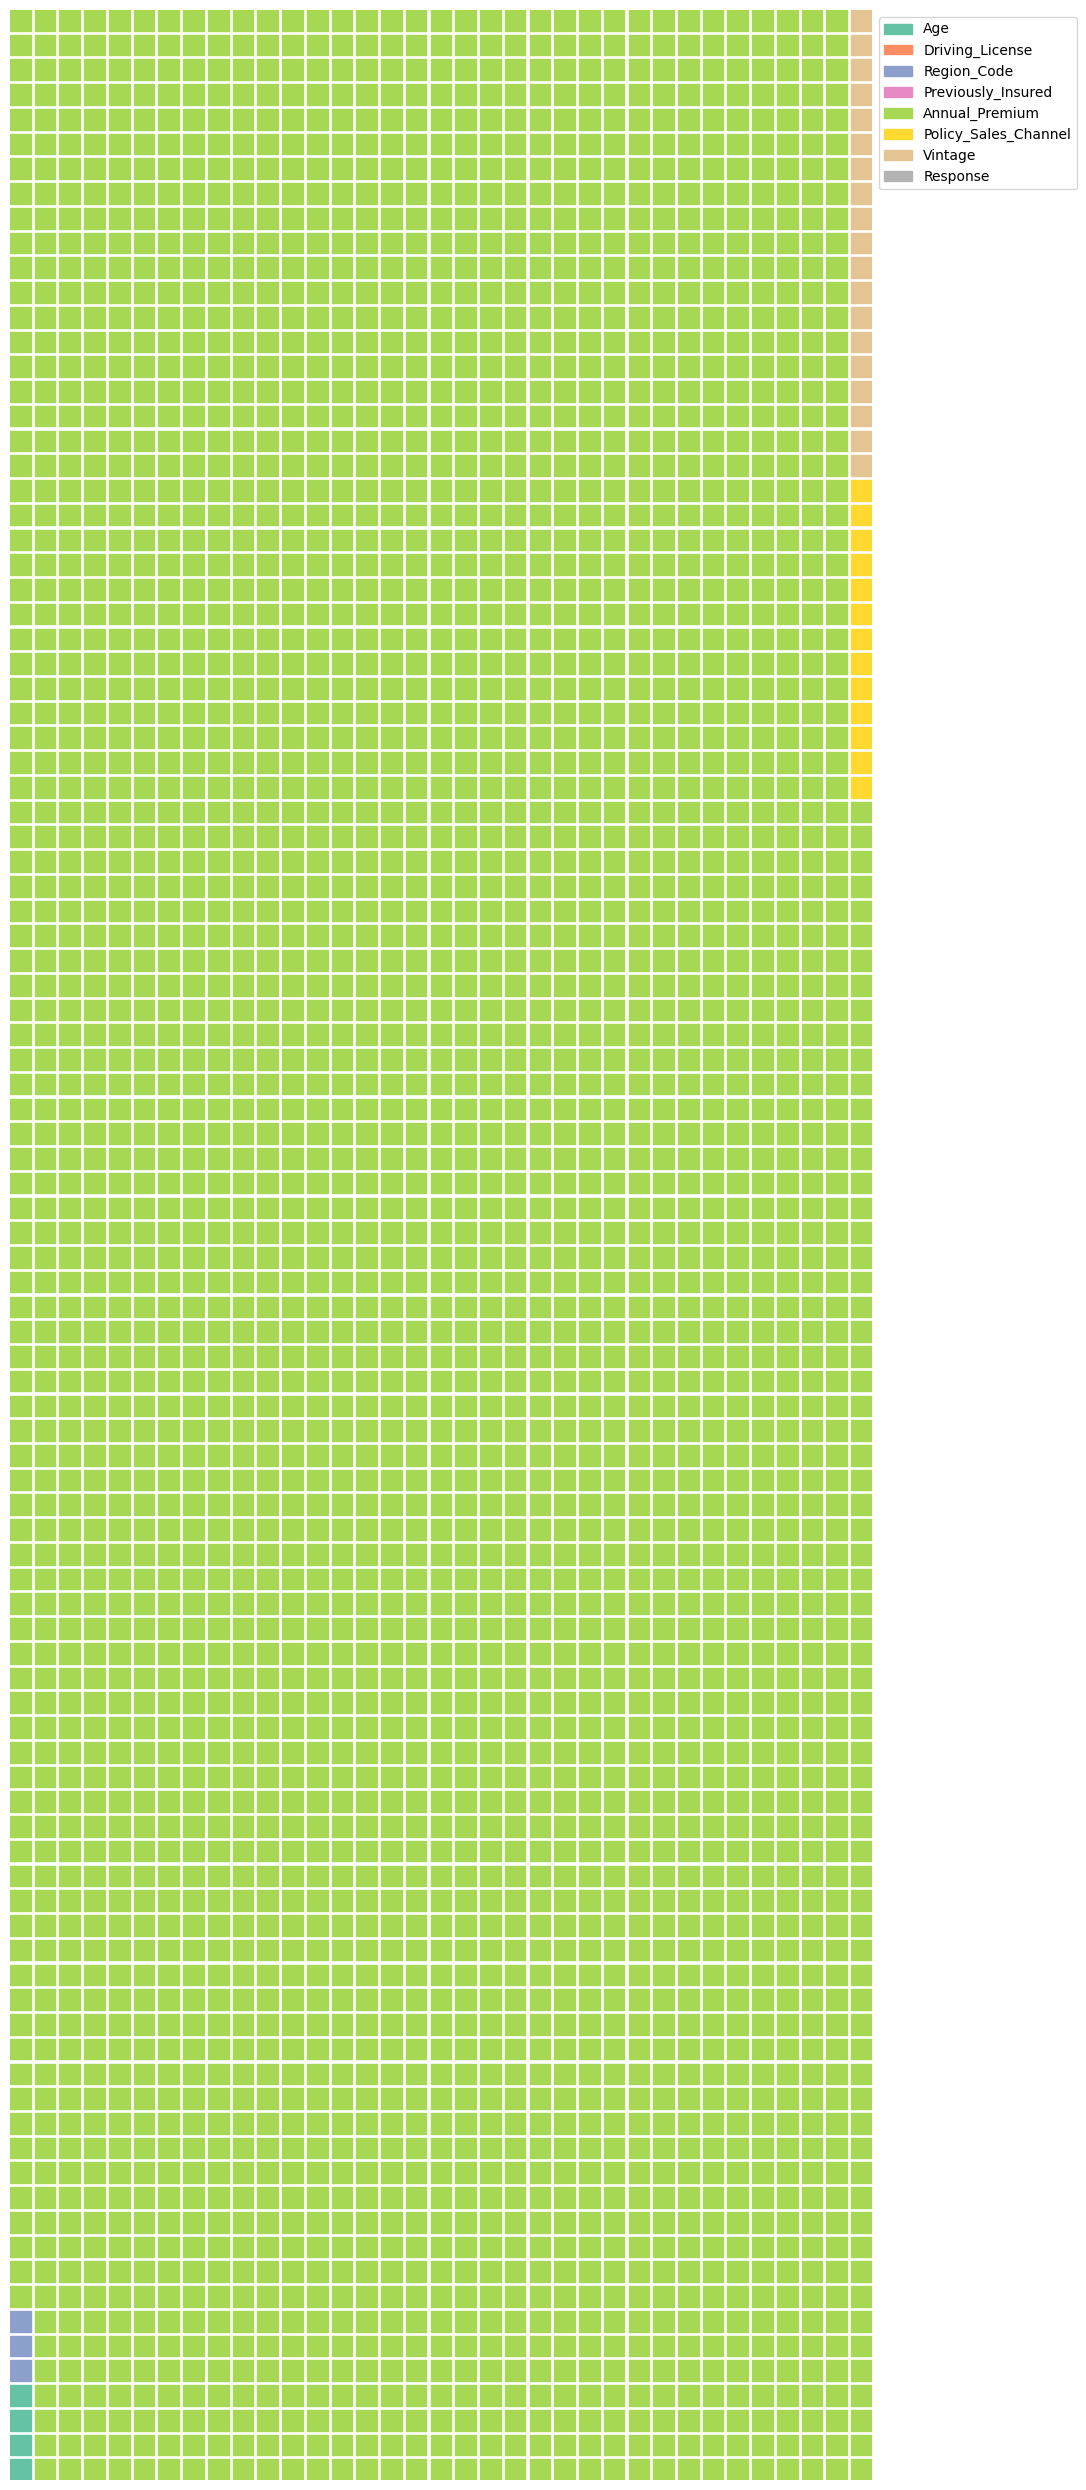

In [ ]:
# Make a waffel for the Data:
# from this waffle i see which Feature is a controled on other features :

import matplotlib.pyplot as plt

from pywaffle import Waffle

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
values = data[numeric_columns].sum().tolist()

fig = plt.figure(
    FigureClass=Waffle,
    rows=100,
    columns=35,
    values=values,
    legend={'labels': numeric_columns.tolist(),
            'loc': "upper left",
            'bbox_to_anchor': (1, 1)},
    figsize=(25, 25)
)
plt.show()

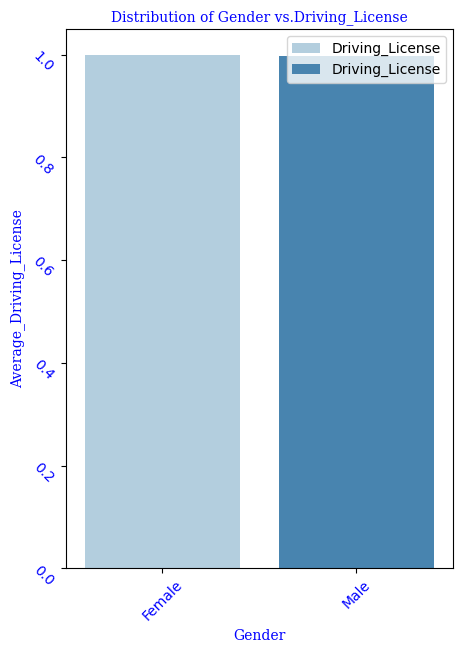

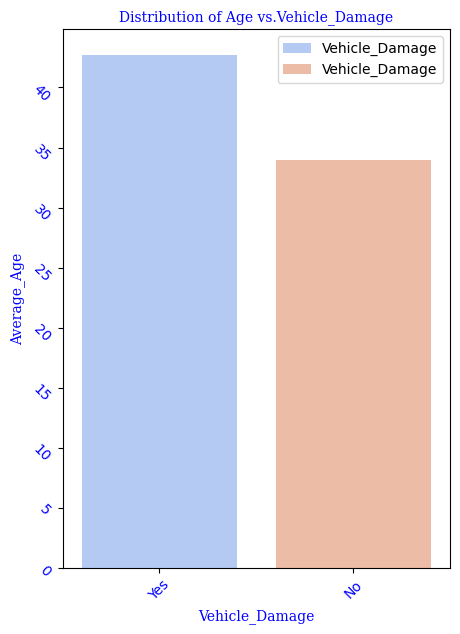

In [ ]:
# observe the Gender vs.Driving_License:

#plot1:

f2={"family":"serif","size":10,"color":"b"}

plt.figure(figsize=(5,7))
plt.title("Distribution of Gender vs.Driving_License",fontdict=f2)
top1=data.groupby("Gender")["Driving_License"].mean().sort_values(ascending=False)
sns.barplot(x=top1.index,y=top1.values,hue=top1.index,color="b",label=["Driving_License"],palette='Blues')
plt.xticks(rotation=45,color="b")
plt.xlabel("Gender",fontdict=f2)
plt.ylabel("Average_Driving_License",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.legend()
plt.show()


# observe Age vs.Vehicle_Damage :
# plot 2:

plt.figure(figsize=(5,7))
plt.title("Distribution of Age vs.Vehicle_Damage",fontdict=f2)
top2=data.groupby("Vehicle_Damage")["Age"].mean().sort_values(ascending=False)
sns.barplot(x=top2.index,y=top2.values,color="b",hue=top2.index,label=["Vehicle_Damage"],palette='coolwarm')
plt.xticks(rotation=45,color="b")
plt.xlabel("Vehicle_Damage",fontdict=f2)
plt.ylabel("Average_Age",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.legend()

plt.show()



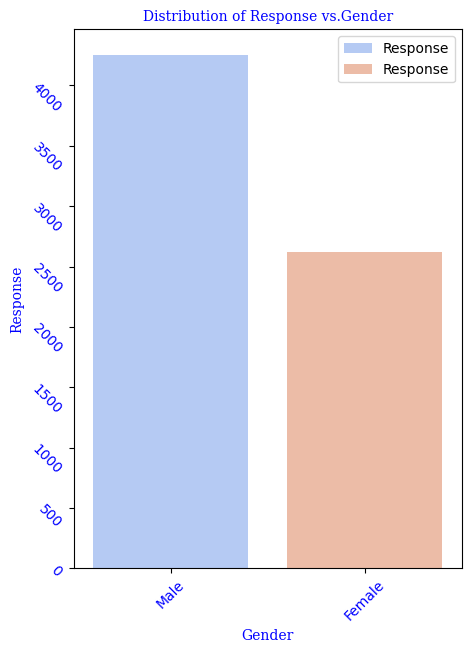

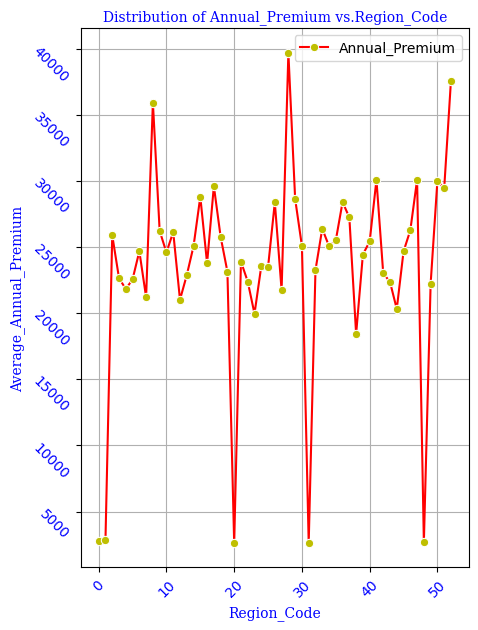

In [ ]:
# observe the Response vs.Gender:

f2={"family":"serif","size":10,"color":"b"}


#barplot:

plt.figure(figsize=(5,7))

plt.title("Distribution of Response vs.Gender",fontdict=f2)
top3=data.groupby("Gender")["Response"].sum().sort_values(ascending=False)

sns.barplot(x=top3.index,y=top3.values,hue=top3.index,color="r",label="Response",palette='coolwarm')

plt.xticks(rotation=45,color="b")
plt.xlabel("Gender",fontdict=f2)
plt.ylabel("Response",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.legend()
plt.show()

# line plot :
plt.figure(figsize=(5,7))
plt.title("Distribution of Annual_Premium vs.Region_Code",fontdict=f2)

top4=data.groupby("Region_Code")["Annual_Premium"].mean().sort_values(ascending=False)
sns.lineplot(x=top4.index,y=top4.values,color="r",label="Annual_Premium",marker="o",mfc="y")

plt.xticks(rotation=45,color="b")
plt.xlabel("Region_Code",fontdict=f2)
plt.ylabel("Average_Annual_Premium",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()


<ipython-input-48-f149df0ec495>:8: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x=top5.index,y=top5.values,color="r",label="Response",palette='coolwarm')


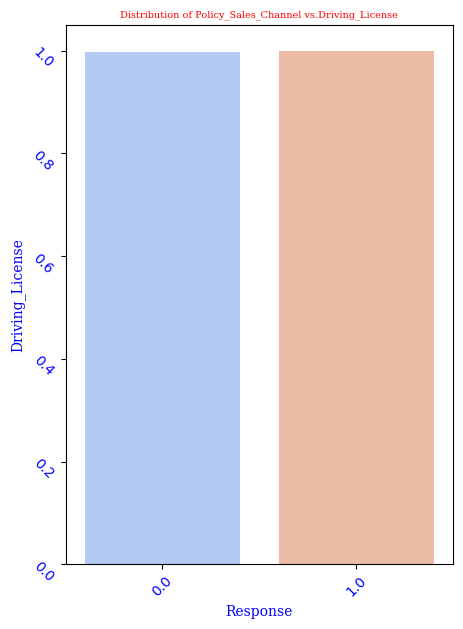

In [ ]:
# bar plot of Response with Driving_License :


plt.figure(figsize=(5,7))
plt.title("Distribution of Policy_Sales_Channel vs.Driving_License",fontdict=f1)

top5=data.groupby("Response")["Driving_License"].mean().sort_values(ascending=False)
sns.barplot(x=top5.index,y=top5.values,color="r",label="Response",palette='coolwarm')

plt.xticks(rotation=45,color="b")
plt.xlabel("Response",fontdict=f2)
plt.ylabel("Driving_License",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.show()




array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Driving_License'}>,
        <Axes: title={'center': 'Region_Code'}>],
       [<Axes: title={'center': 'Previously_Insured'}>,
        <Axes: title={'center': 'Annual_Premium'}>,
        <Axes: title={'center': 'Policy_Sales_Channel'}>],
       [<Axes: title={'center': 'Vintage'}>,
        <Axes: title={'center': 'Response'}>, <Axes: >]], dtype=object)

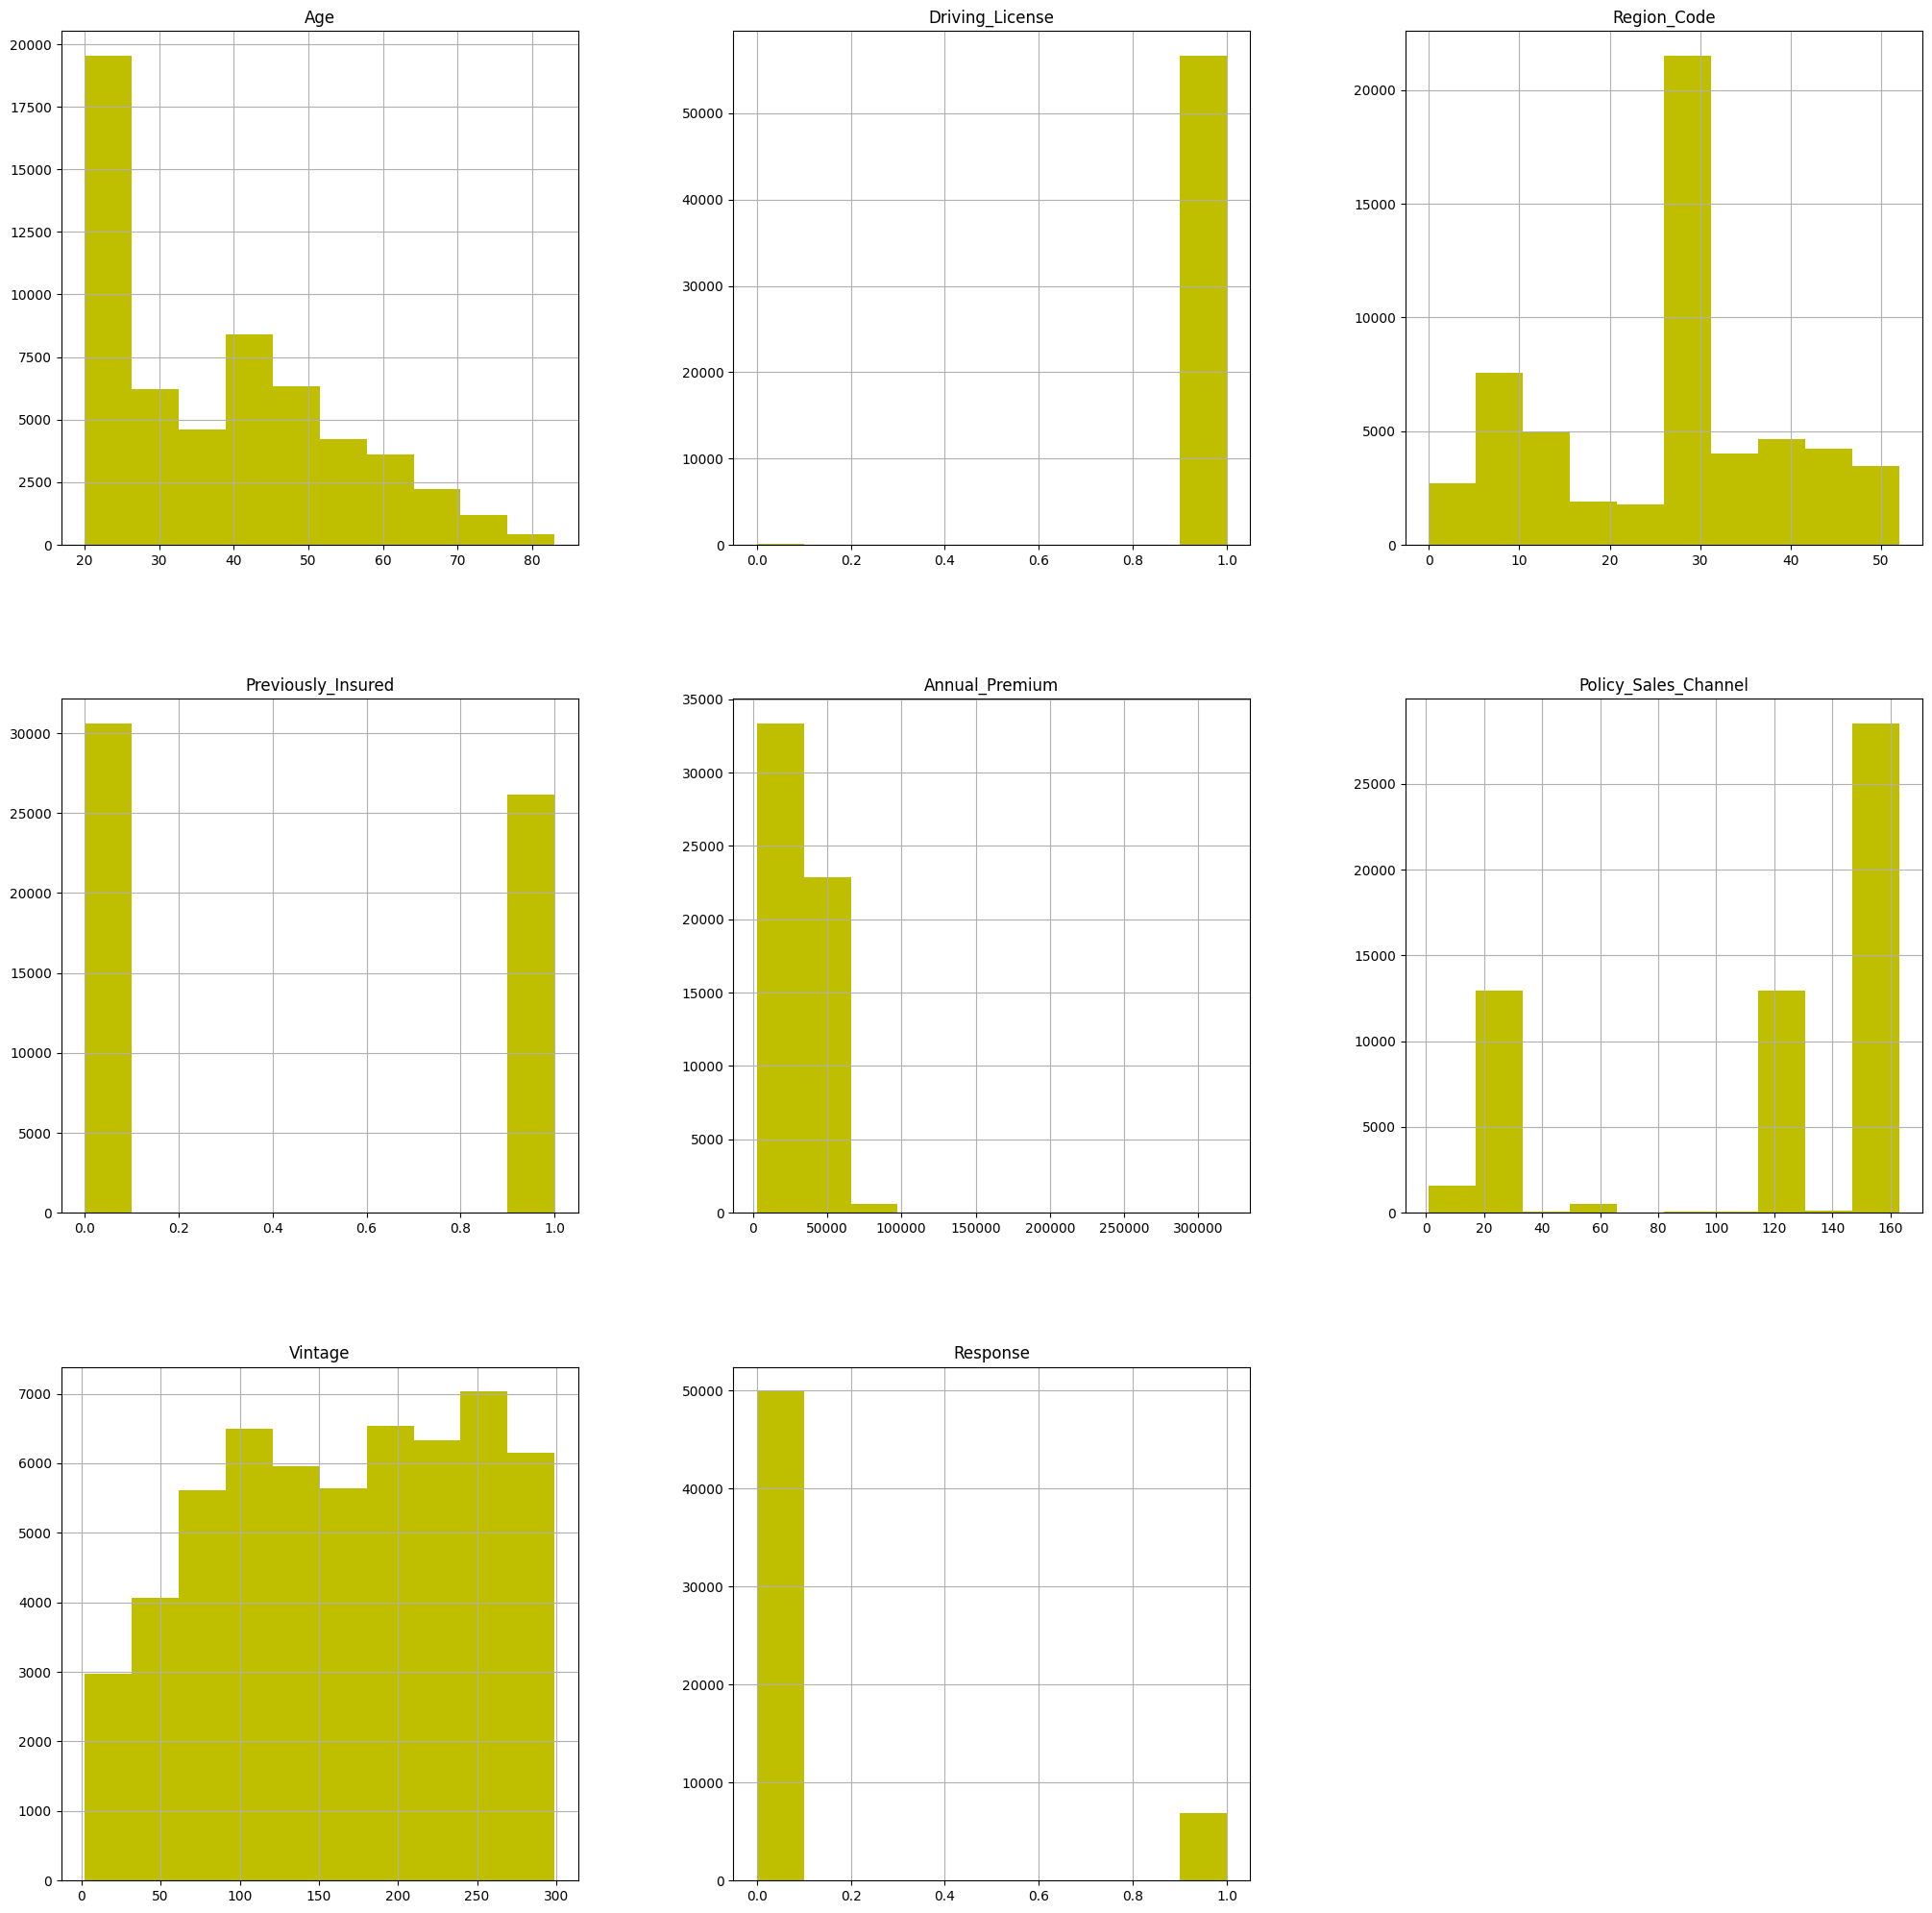

In [ ]:
# plot the histgram:
data.hist(figsize=(25,25),color="y")

<Figure size 3600x3000 with 0 Axes>

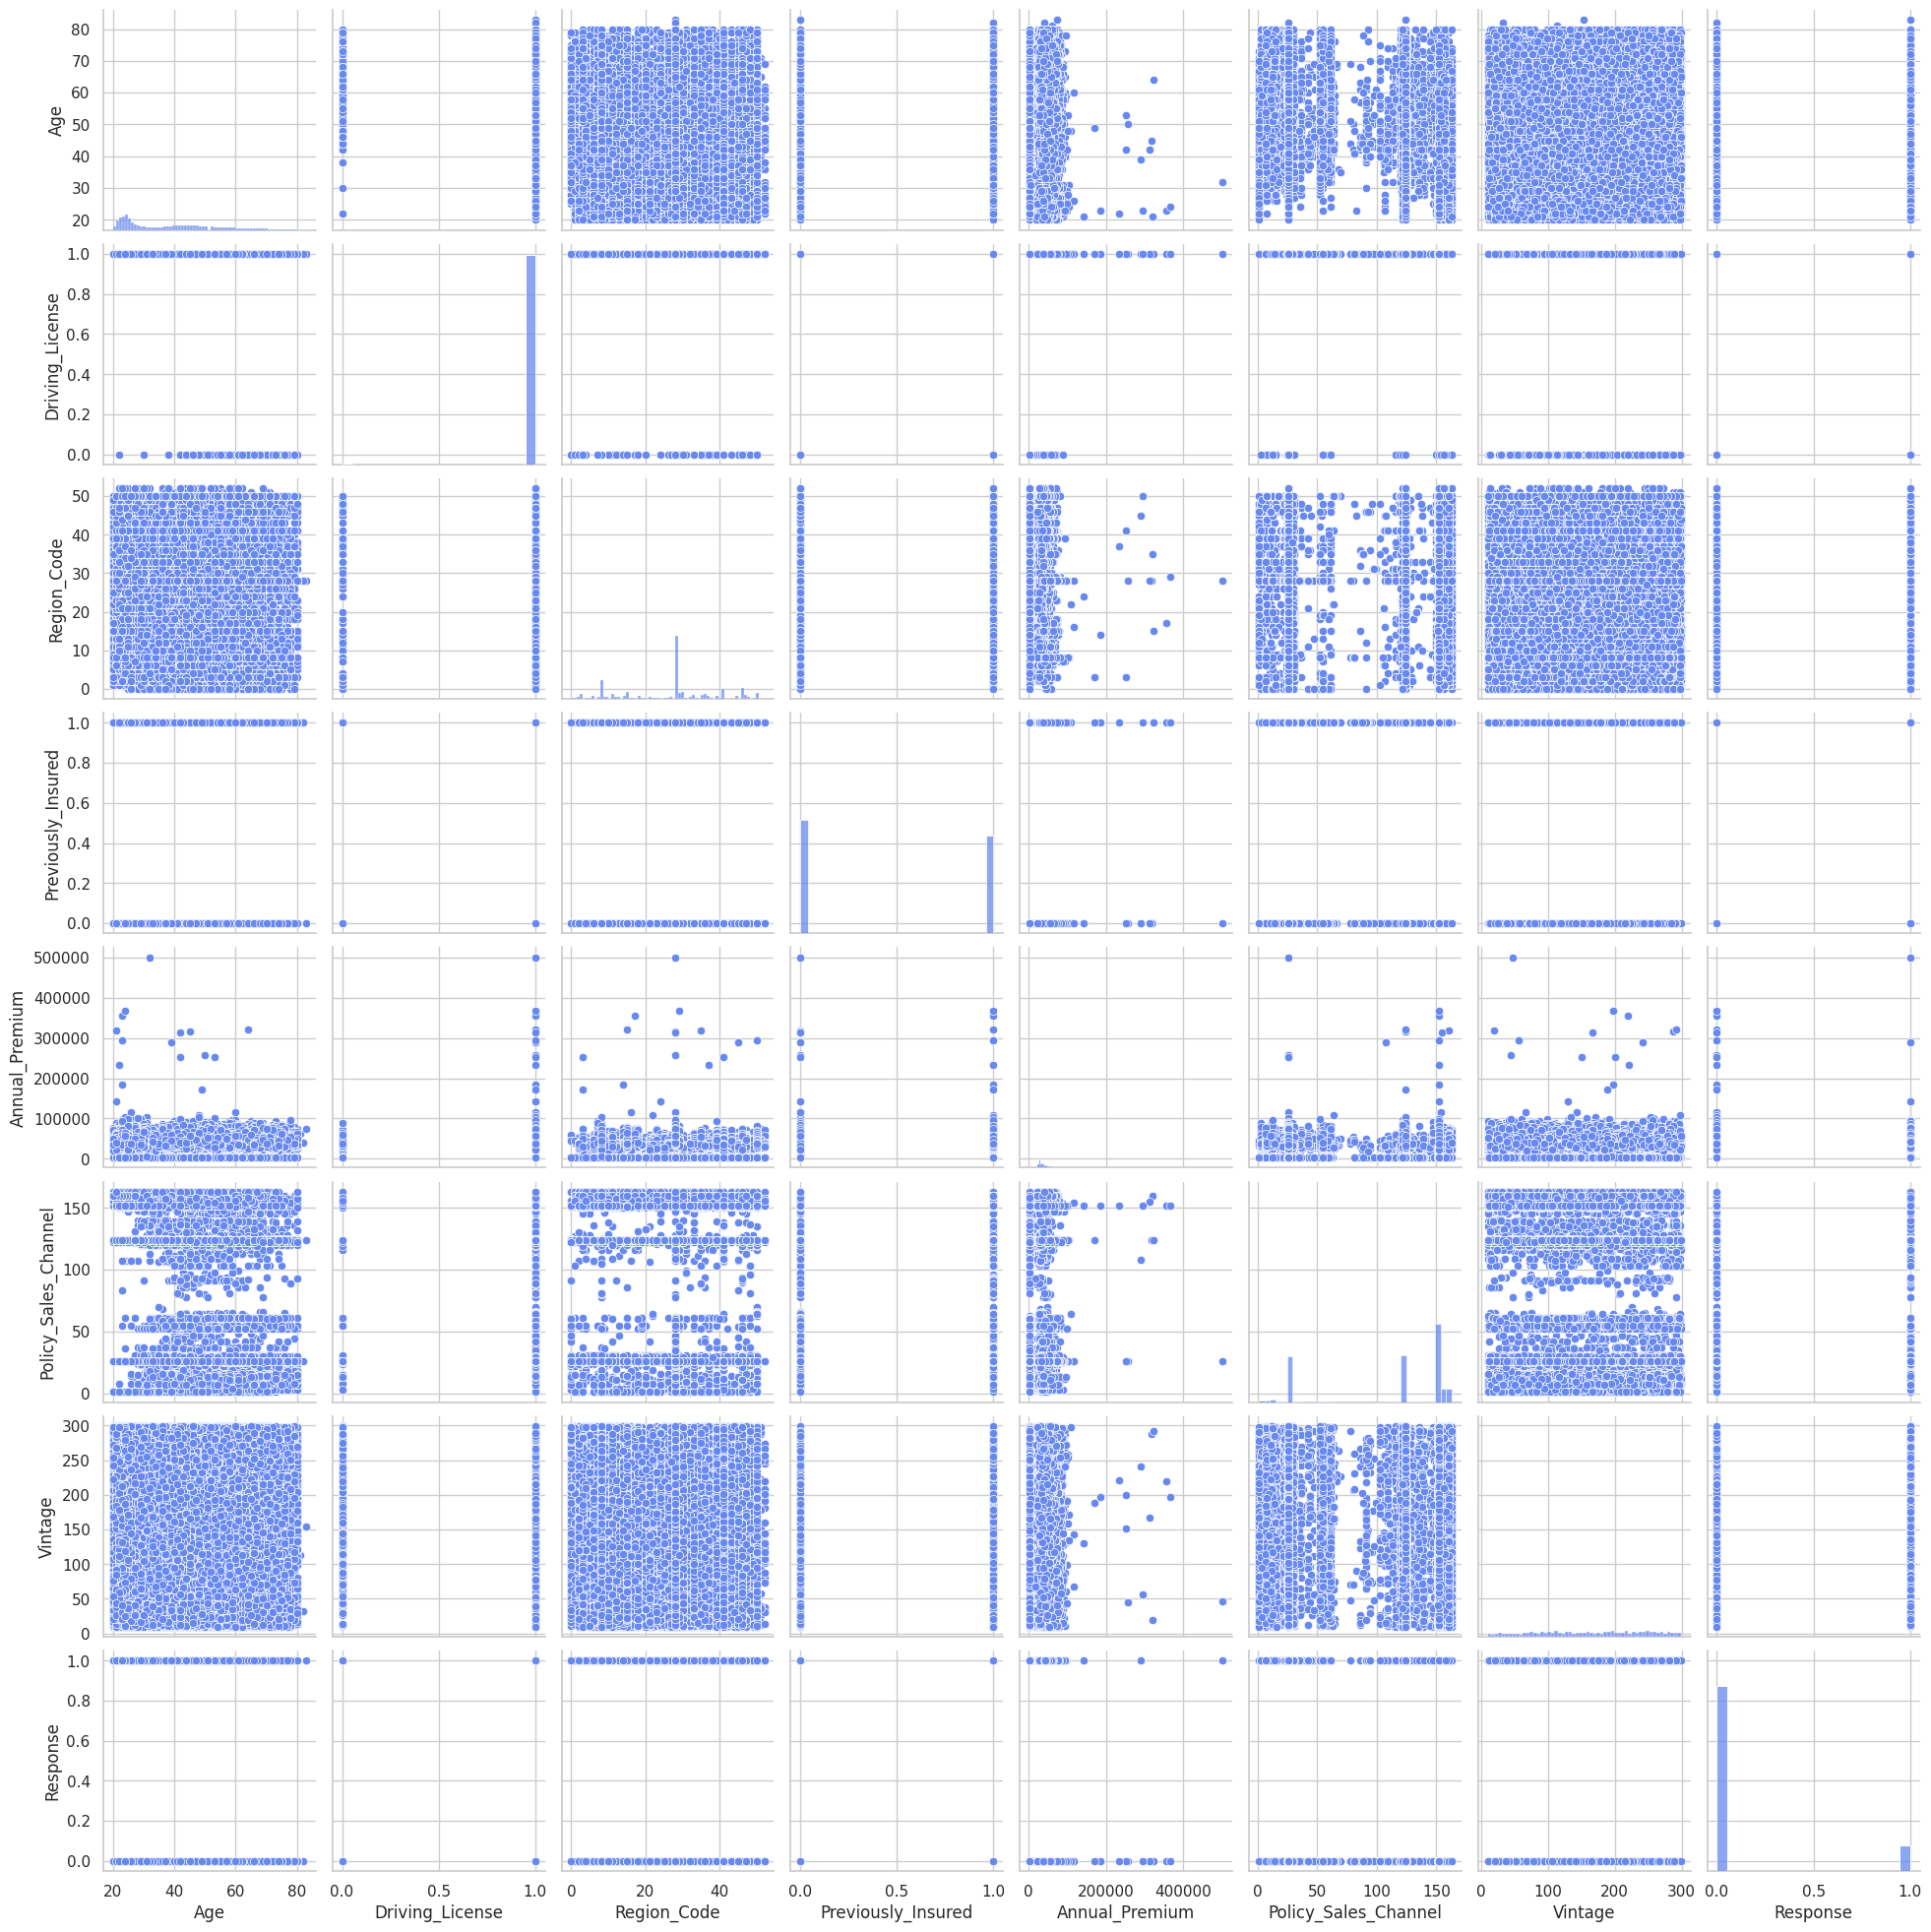

In [ ]:
# observe for the float_data
plt.figure(figsize=(30, 25), dpi=120)
sns.set(style="whitegrid")  # Set the plot style
sns.set_palette("coolwarm")    # Set the color palette
sns.pairplot(data.select_dtypes(include='float64'))

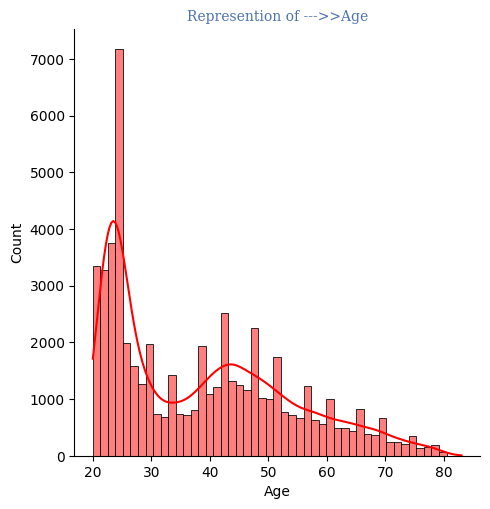

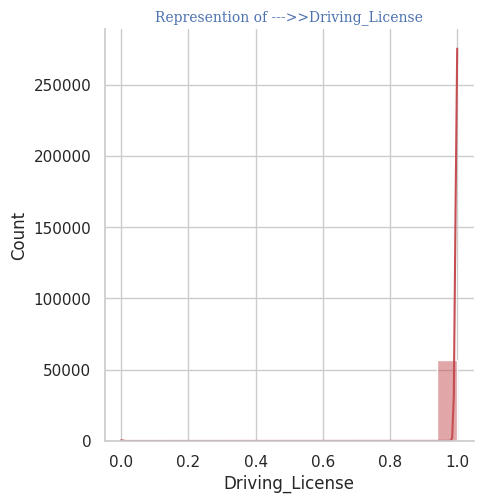

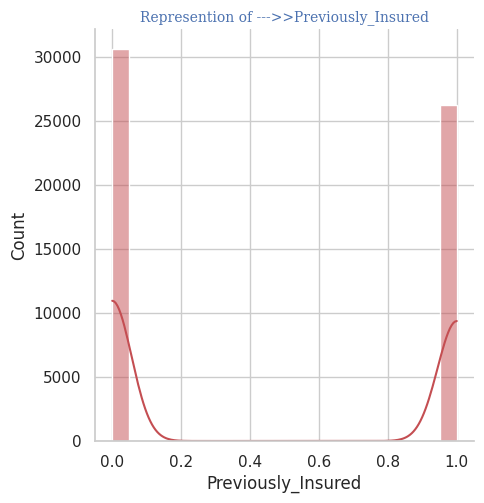

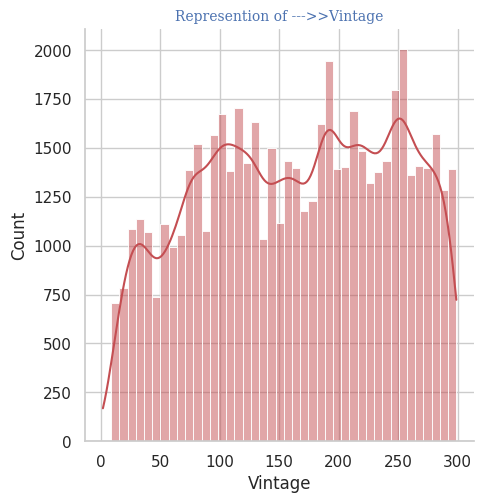

In [ ]:
for col in data.select_dtypes(include="int64").columns:
    sns.displot(data[col],kde=True,color="r",label=col)
    sns.set(style="whitegrid")  # Set the plot style
    sns.set_palette("coolwarm")    # Set the color palette
    plt.title("Represention of --->>"+col,fontdict=f2)

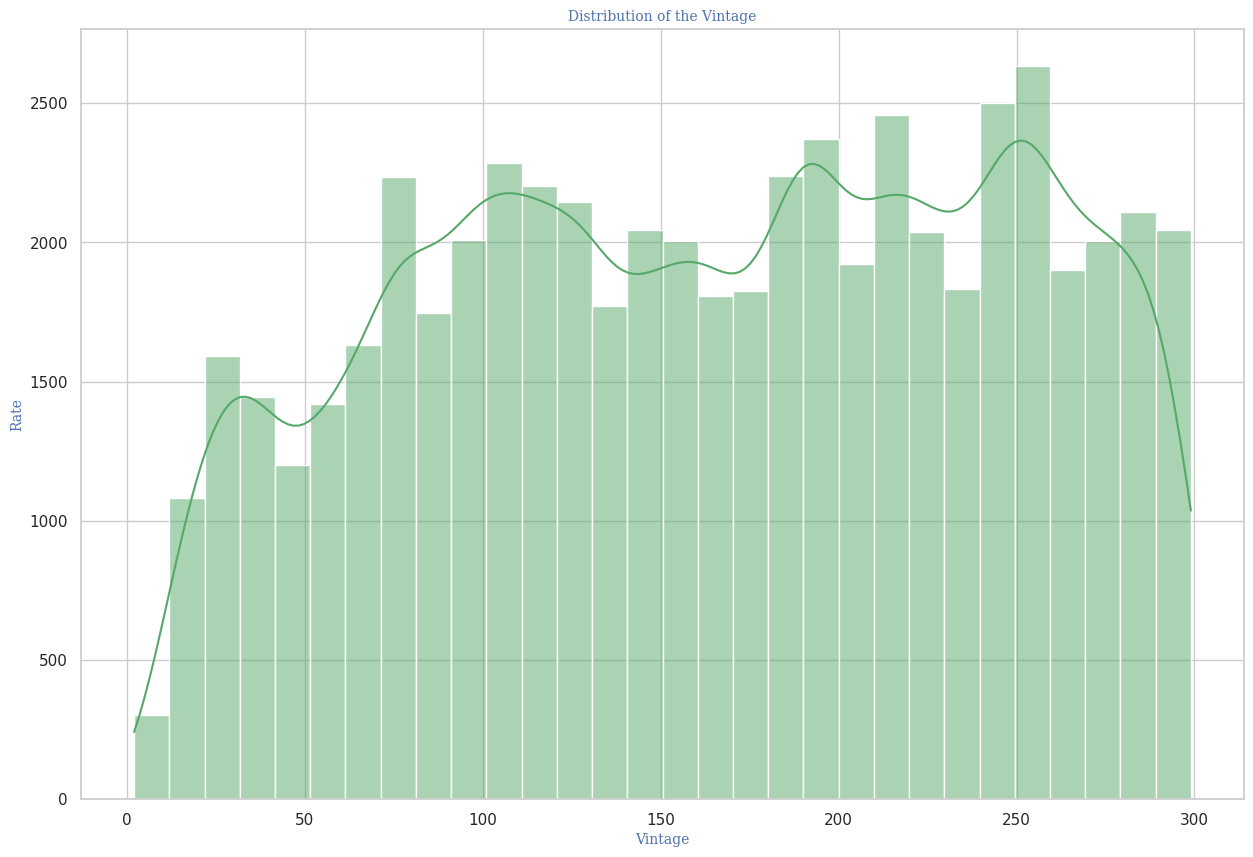

In [ ]:
#observe the Vintage distribution:

plt.figure(figsize=(15,10))
plt.title("Distribution of the Vintage",fontdict=f2)
plt.xlabel("Vintage",fontdict=f2)
plt.ylabel("Rate",fontdict=f2)
sns.histplot(data["Vintage"],color="g",bins=30,kde=True,label="Vintage")
plt.show()

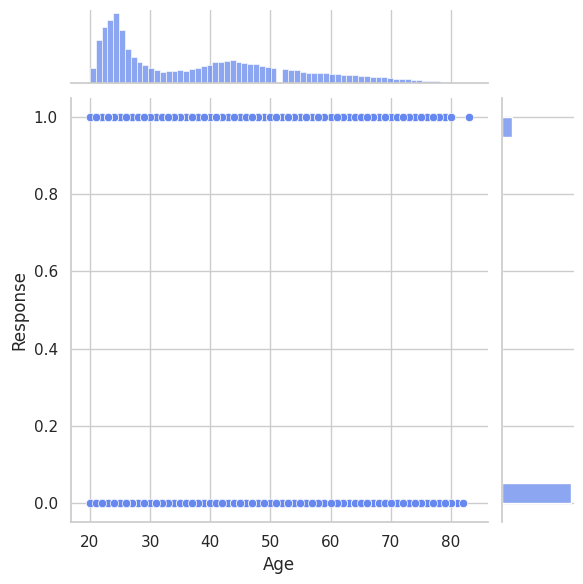

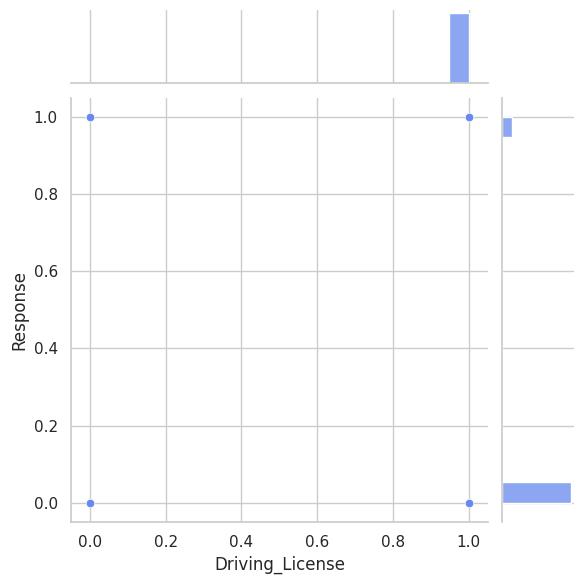

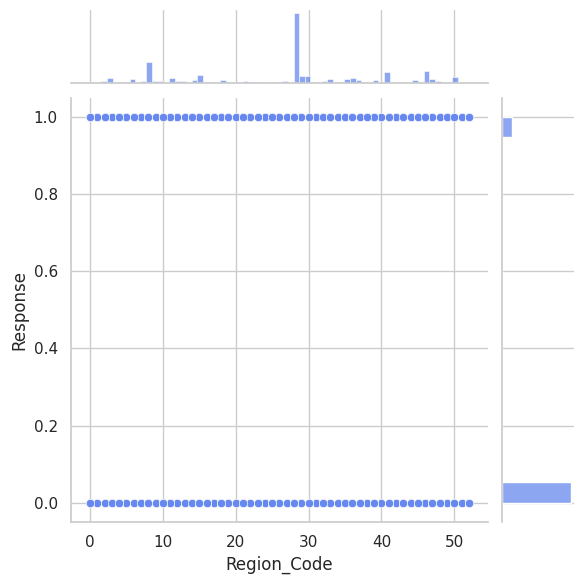

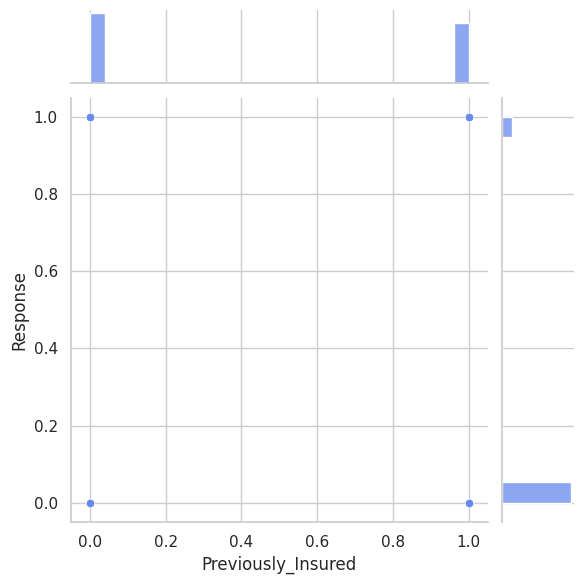

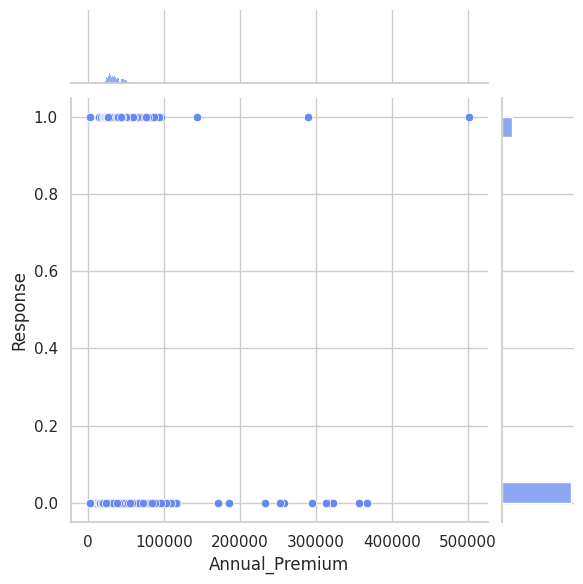

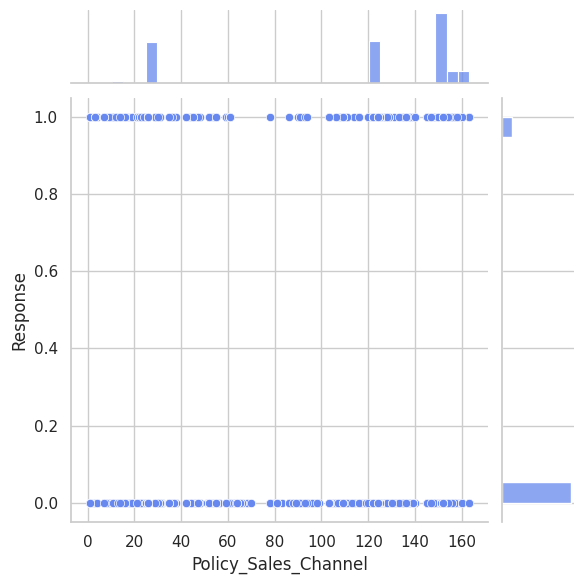

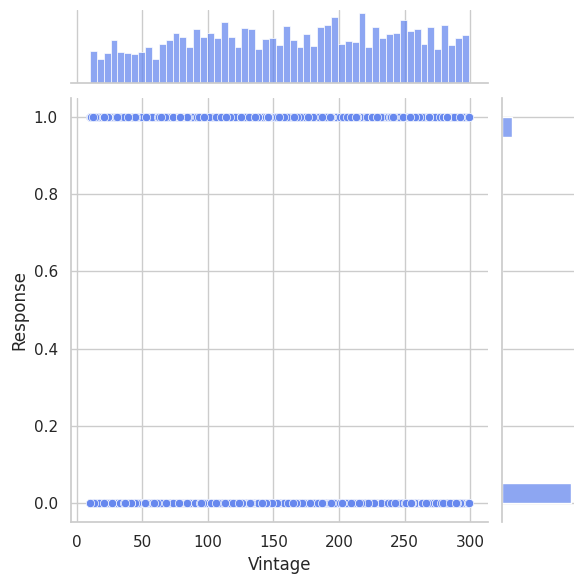

In [ ]:
for col in data.select_dtypes("number"):
    if col !="Response":
       with sns.axes_style("white"):
          sns.set(style="whitegrid")  # Set the plot style
          sns.set_palette("coolwarm")    # Set the color palette
          sns.jointplot(x=data[col],y=data["Response"],kind="scatter")

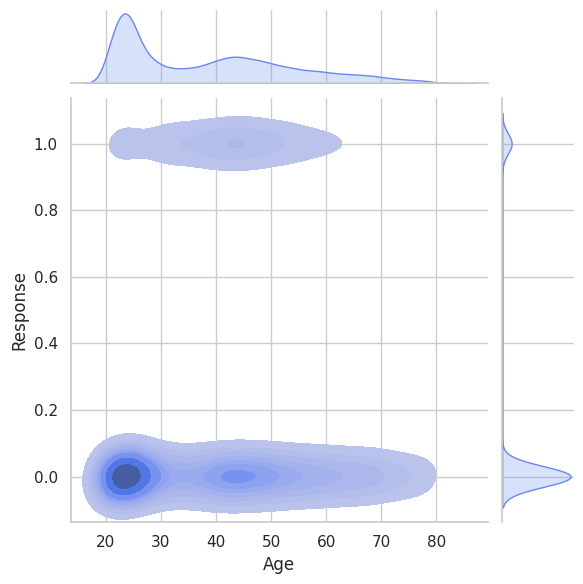

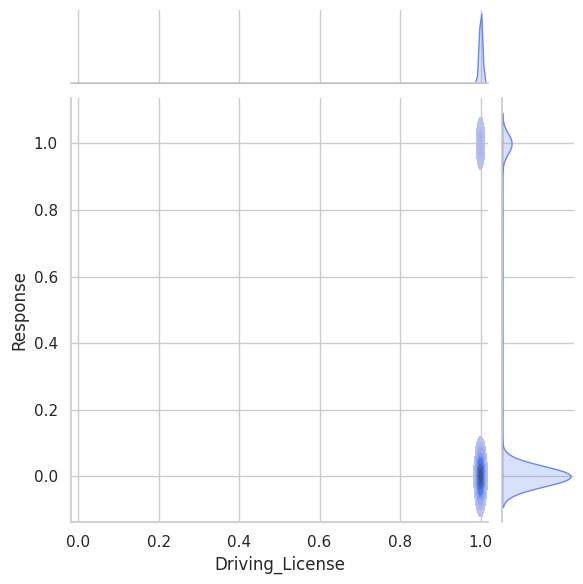

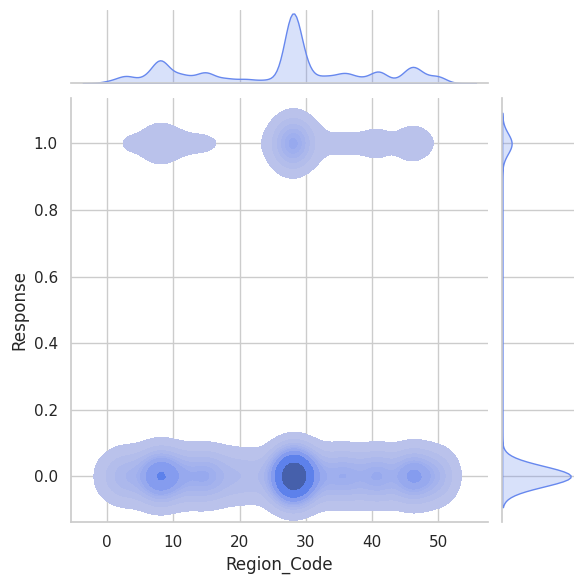

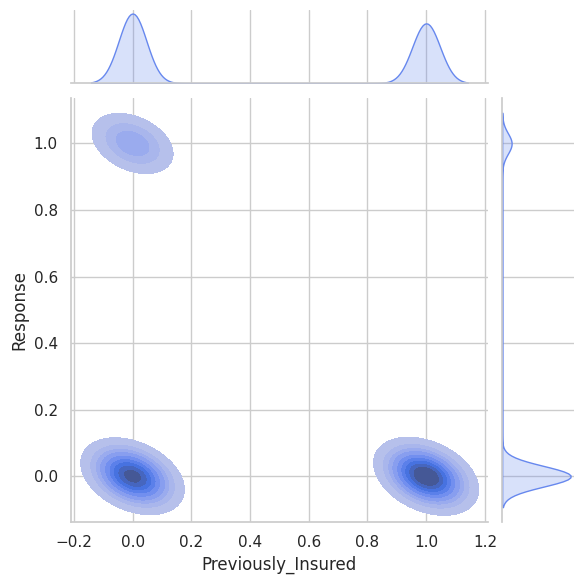

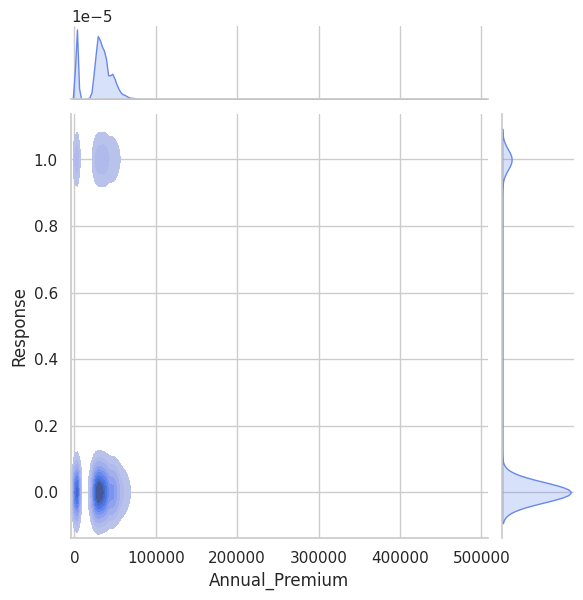

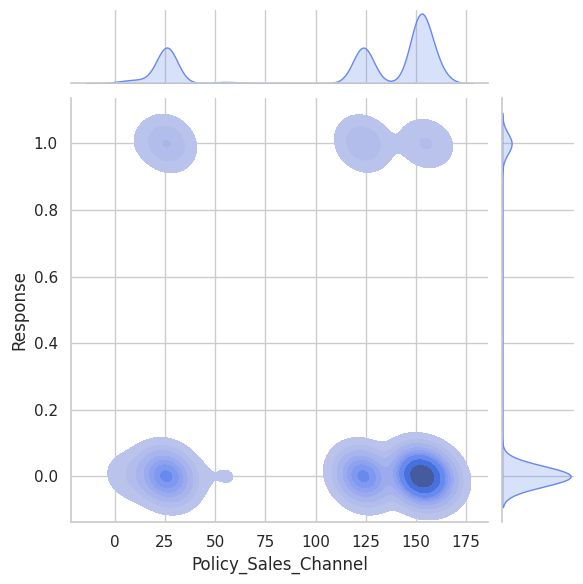

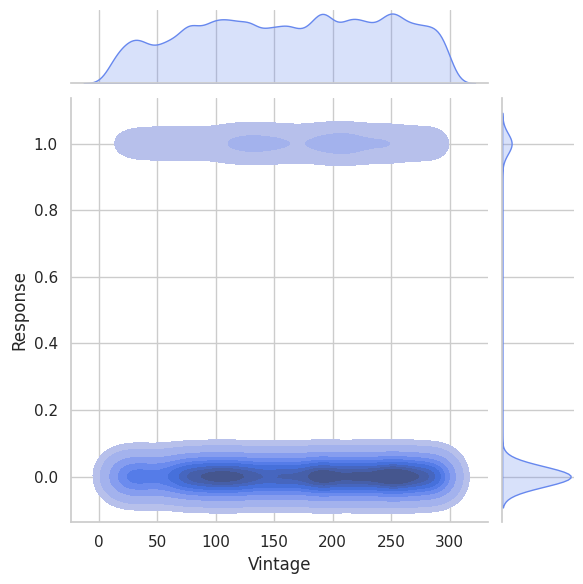

In [ ]:
for col in data.select_dtypes("number"):
    if col !="Response":
       with sns.axes_style("white"):
          sns.set(style="whitegrid")  # Set the plot style
          sns.set_palette("coolwarm")    # Set the color palette
          sns.jointplot(x=data[col],y=data["Response"],kind="kde",fill=True)

## Explantory on Dataset: (correlations , outliers ,Anova ,heatmap) :

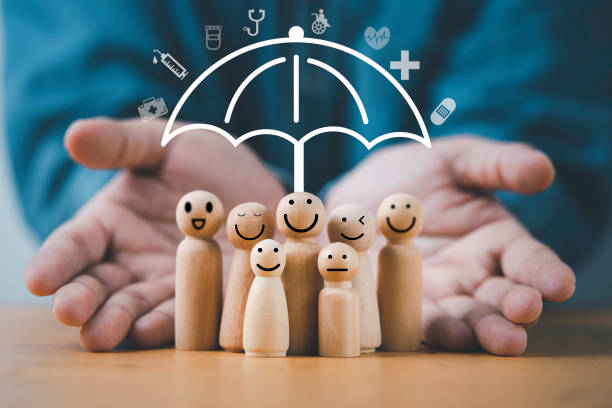

In [ ]:
# image5 :
img5=Image("insurance5.jpg")
display(img5)

In [ ]:
# VaraianceThreshold:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [ ]:
class Var_Selector(BaseEstimator,TransformerMixin):

    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])

        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)

        # remove high-low cardinality categorical:-

        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index

        return data.drop(columns=removed_cols)


In [ ]:
transform=Var_Selector(data)
transform.fit(data)
transform.transform(data)

Gender  Age  Region_Code  Previously_Insured           Vehicle_Age  \
0        Male   21         35.0                   0              1-2 Year   
1        Male   43         28.0                   0  bigger_than_ 2 Years   
2      Female   25         14.0                   1  smaller_than_ 1 Year   
3      Female   35          1.0                   0              1-2 Year   
4      Female   36         15.0                   1              1-2 Year   
...       ...  ...          ...                 ...                   ...   
56799  Female   24          9.0                   0  smaller_than_ 1 Year   
56800  Female   42         50.0                   0              1-2 Year   
56801  Female   26         25.0                   1  smaller_than_ 1 Year   
56802  Female   73         14.0                   0              1-2 Year   
56803    Male   46         46.0                   0              1-2 Year   

      Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0                Yes         65101.0                 124.0      187       0.0  
1                Yes         58911.0                  26.0      288       1.0  
2                 No         38043.0                 152.0      254       0.0  
3                Yes          2630.0                 156.0       76       0.0  
4                 No         31951.0                 152.0      294       0.0  
...              ...             ...                   ...      ...       ...  
56799            Yes         28173.0                 152.0      160       0.0  
56800            Yes         54955.0                   8.0      270       0.0  
56801             No         29960.0                 152.0      126       0.0  
56802            Yes          2630.0                 124.0      194       1.0  
56803            Yes         34451.0                 124.0        2       0.0  

[56804 rows x 10 columns]

In [ ]:
# Check if there are aduplicated values in the data:
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)

Number of duplicates ----->>>  0


In [ ]:
# Calculate the correlation :

corr=data.select_dtypes("number").corr()
corr


Age  Driving_License  Region_Code  \
Age                   1.000000        -0.072145     0.040175   
Driving_License      -0.072145         1.000000    -0.008787   
Region_Code           0.040175        -0.008787     1.000000   
Previously_Insured   -0.278429         0.012167    -0.022493   
Annual_Premium        0.051617        -0.004347     0.001823   
Policy_Sales_Channel -0.592548         0.038640    -0.050619   
Vintage              -0.018290         0.001203    -0.010647   
Response              0.127065         0.013537     0.009526   

                      Previously_Insured  Annual_Premium  \
Age                            -0.278429        0.051617   
Driving_License                 0.012167       -0.004347   
Region_Code                    -0.022493        0.001823   
Previously_Insured              1.000000        0.012363   
Annual_Premium                  0.012363        1.000000   
Policy_Sales_Channel            0.242199       -0.133121   
Vintage                         0.024346        0.004017   
Response                       -0.341562        0.029873   

                      Policy_Sales_Channel   Vintage  Response  
Age                              -0.592548 -0.018290  0.127065  
Driving_License                   0.038640  0.001203  0.013537  
Region_Code                      -0.050619 -0.010647  0.009526  
Previously_Insured                0.242199  0.024346 -0.341562  
Annual_Premium                   -0.133121  0.004017  0.029873  
Policy_Sales_Channel              1.000000  0.013461 -0.154727  
Vintage                           0.013461  1.000000 -0.017098  
Response                         -0.154727 -0.017098  1.000000

In [ ]:
sperman=data.select_dtypes("number").corr(method="spearman")
sperman


Age  Driving_License  Region_Code  \
Age                   1.000000        -0.059880     0.004911   
Driving_License      -0.059880         1.000000    -0.008116   
Region_Code           0.004911        -0.008116     1.000000   
Previously_Insured   -0.288488         0.012167     0.001429   
Annual_Premium        0.102629        -0.005458    -0.037157   
Policy_Sales_Channel -0.658706         0.040633    -0.014666   
Vintage              -0.020115         0.001101    -0.010882   
Response              0.157505         0.013537    -0.003252   

                      Previously_Insured  Annual_Premium  \
Age                            -0.288488        0.102629   
Driving_License                 0.012167       -0.005458   
Region_Code                     0.001429       -0.037157   
Previously_Insured              1.000000       -0.036638   
Annual_Premium                 -0.036638        1.000000   
Policy_Sales_Channel            0.228766       -0.230405   
Vintage                         0.024603        0.005890   
Response                       -0.341562        0.047490   

                      Policy_Sales_Channel   Vintage  Response  
Age                              -0.658706 -0.020115  0.157505  
Driving_License                   0.040633  0.001101  0.013537  
Region_Code                      -0.014666 -0.010882 -0.003252  
Previously_Insured                0.228766  0.024603 -0.341562  
Annual_Premium                   -0.230405  0.005890  0.047490  
Policy_Sales_Channel              1.000000  0.015086 -0.157213  
Vintage                           0.015086  1.000000 -0.016960  
Response                         -0.157213 -0.016960  1.000000

In [ ]:
pearson=data.select_dtypes("number").corr(method="pearson")
pearson


Age  Driving_License  Region_Code  \
Age                   1.000000        -0.072145     0.040175   
Driving_License      -0.072145         1.000000    -0.008787   
Region_Code           0.040175        -0.008787     1.000000   
Previously_Insured   -0.278429         0.012167    -0.022493   
Annual_Premium        0.051617        -0.004347     0.001823   
Policy_Sales_Channel -0.592548         0.038640    -0.050619   
Vintage              -0.018290         0.001203    -0.010647   
Response              0.127065         0.013537     0.009526   

                      Previously_Insured  Annual_Premium  \
Age                            -0.278429        0.051617   
Driving_License                 0.012167       -0.004347   
Region_Code                    -0.022493        0.001823   
Previously_Insured              1.000000        0.012363   
Annual_Premium                  0.012363        1.000000   
Policy_Sales_Channel            0.242199       -0.133121   
Vintage                         0.024346        0.004017   
Response                       -0.341562        0.029873   

                      Policy_Sales_Channel   Vintage  Response  
Age                              -0.592548 -0.018290  0.127065  
Driving_License                   0.038640  0.001203  0.013537  
Region_Code                      -0.050619 -0.010647  0.009526  
Previously_Insured                0.242199  0.024346 -0.341562  
Annual_Premium                   -0.133121  0.004017  0.029873  
Policy_Sales_Channel              1.000000  0.013461 -0.154727  
Vintage                           0.013461  1.000000 -0.017098  
Response                         -0.154727 -0.017098  1.000000

In [ ]:
kendall=data.select_dtypes("number").corr(method="kendall")
kendall


Age  Driving_License  Region_Code  \
Age                   1.000000        -0.049599     0.002991   
Driving_License      -0.049599         1.000000    -0.006929   
Region_Code           0.002991        -0.006929     1.000000   
Previously_Insured   -0.238954         0.012167     0.001220   
Annual_Premium        0.069317        -0.004520    -0.027827   
Policy_Sales_Channel -0.505143         0.036312    -0.011061   
Vintage              -0.013634         0.000901    -0.007612   
Response              0.130461         0.013537    -0.002777   

                      Previously_Insured  Annual_Premium  \
Age                            -0.238954        0.069317   
Driving_License                 0.012167       -0.004520   
Region_Code                     0.001220       -0.027827   
Previously_Insured              1.000000       -0.030342   
Annual_Premium                 -0.030342        1.000000   
Policy_Sales_Channel            0.204437       -0.177044   
Vintage                         0.020129        0.004011   
Response                       -0.341562        0.039329   

                      Policy_Sales_Channel   Vintage  Response  
Age                              -0.505143 -0.013634  0.130461  
Driving_License                   0.036312  0.000901  0.013537  
Region_Code                      -0.011061 -0.007612 -0.002777  
Previously_Insured                0.204437  0.020129 -0.341562  
Annual_Premium                   -0.177044  0.004011  0.039329  
Policy_Sales_Channel              1.000000  0.011028 -0.140494  
Vintage                           0.011028  1.000000 -0.013875  
Response                         -0.140494 -0.013875  1.000000

(0.0, 334955.0)

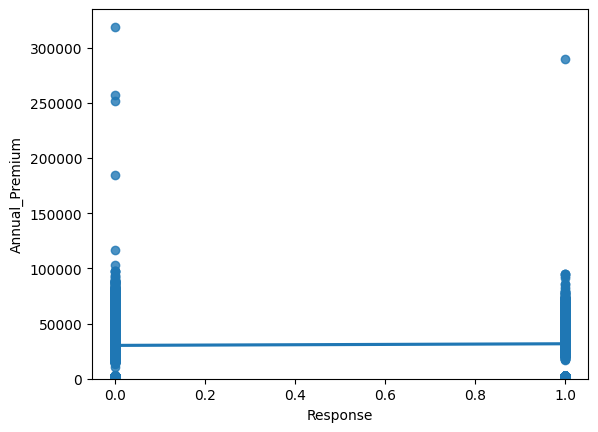

In [ ]:
# No Rellation  :
sns.regplot(x=data["Response"],y=data["Annual_Premium"])
plt.ylim(0,)

Text(0.5, 1.0, 'Correlation_heatmap_Matrix')

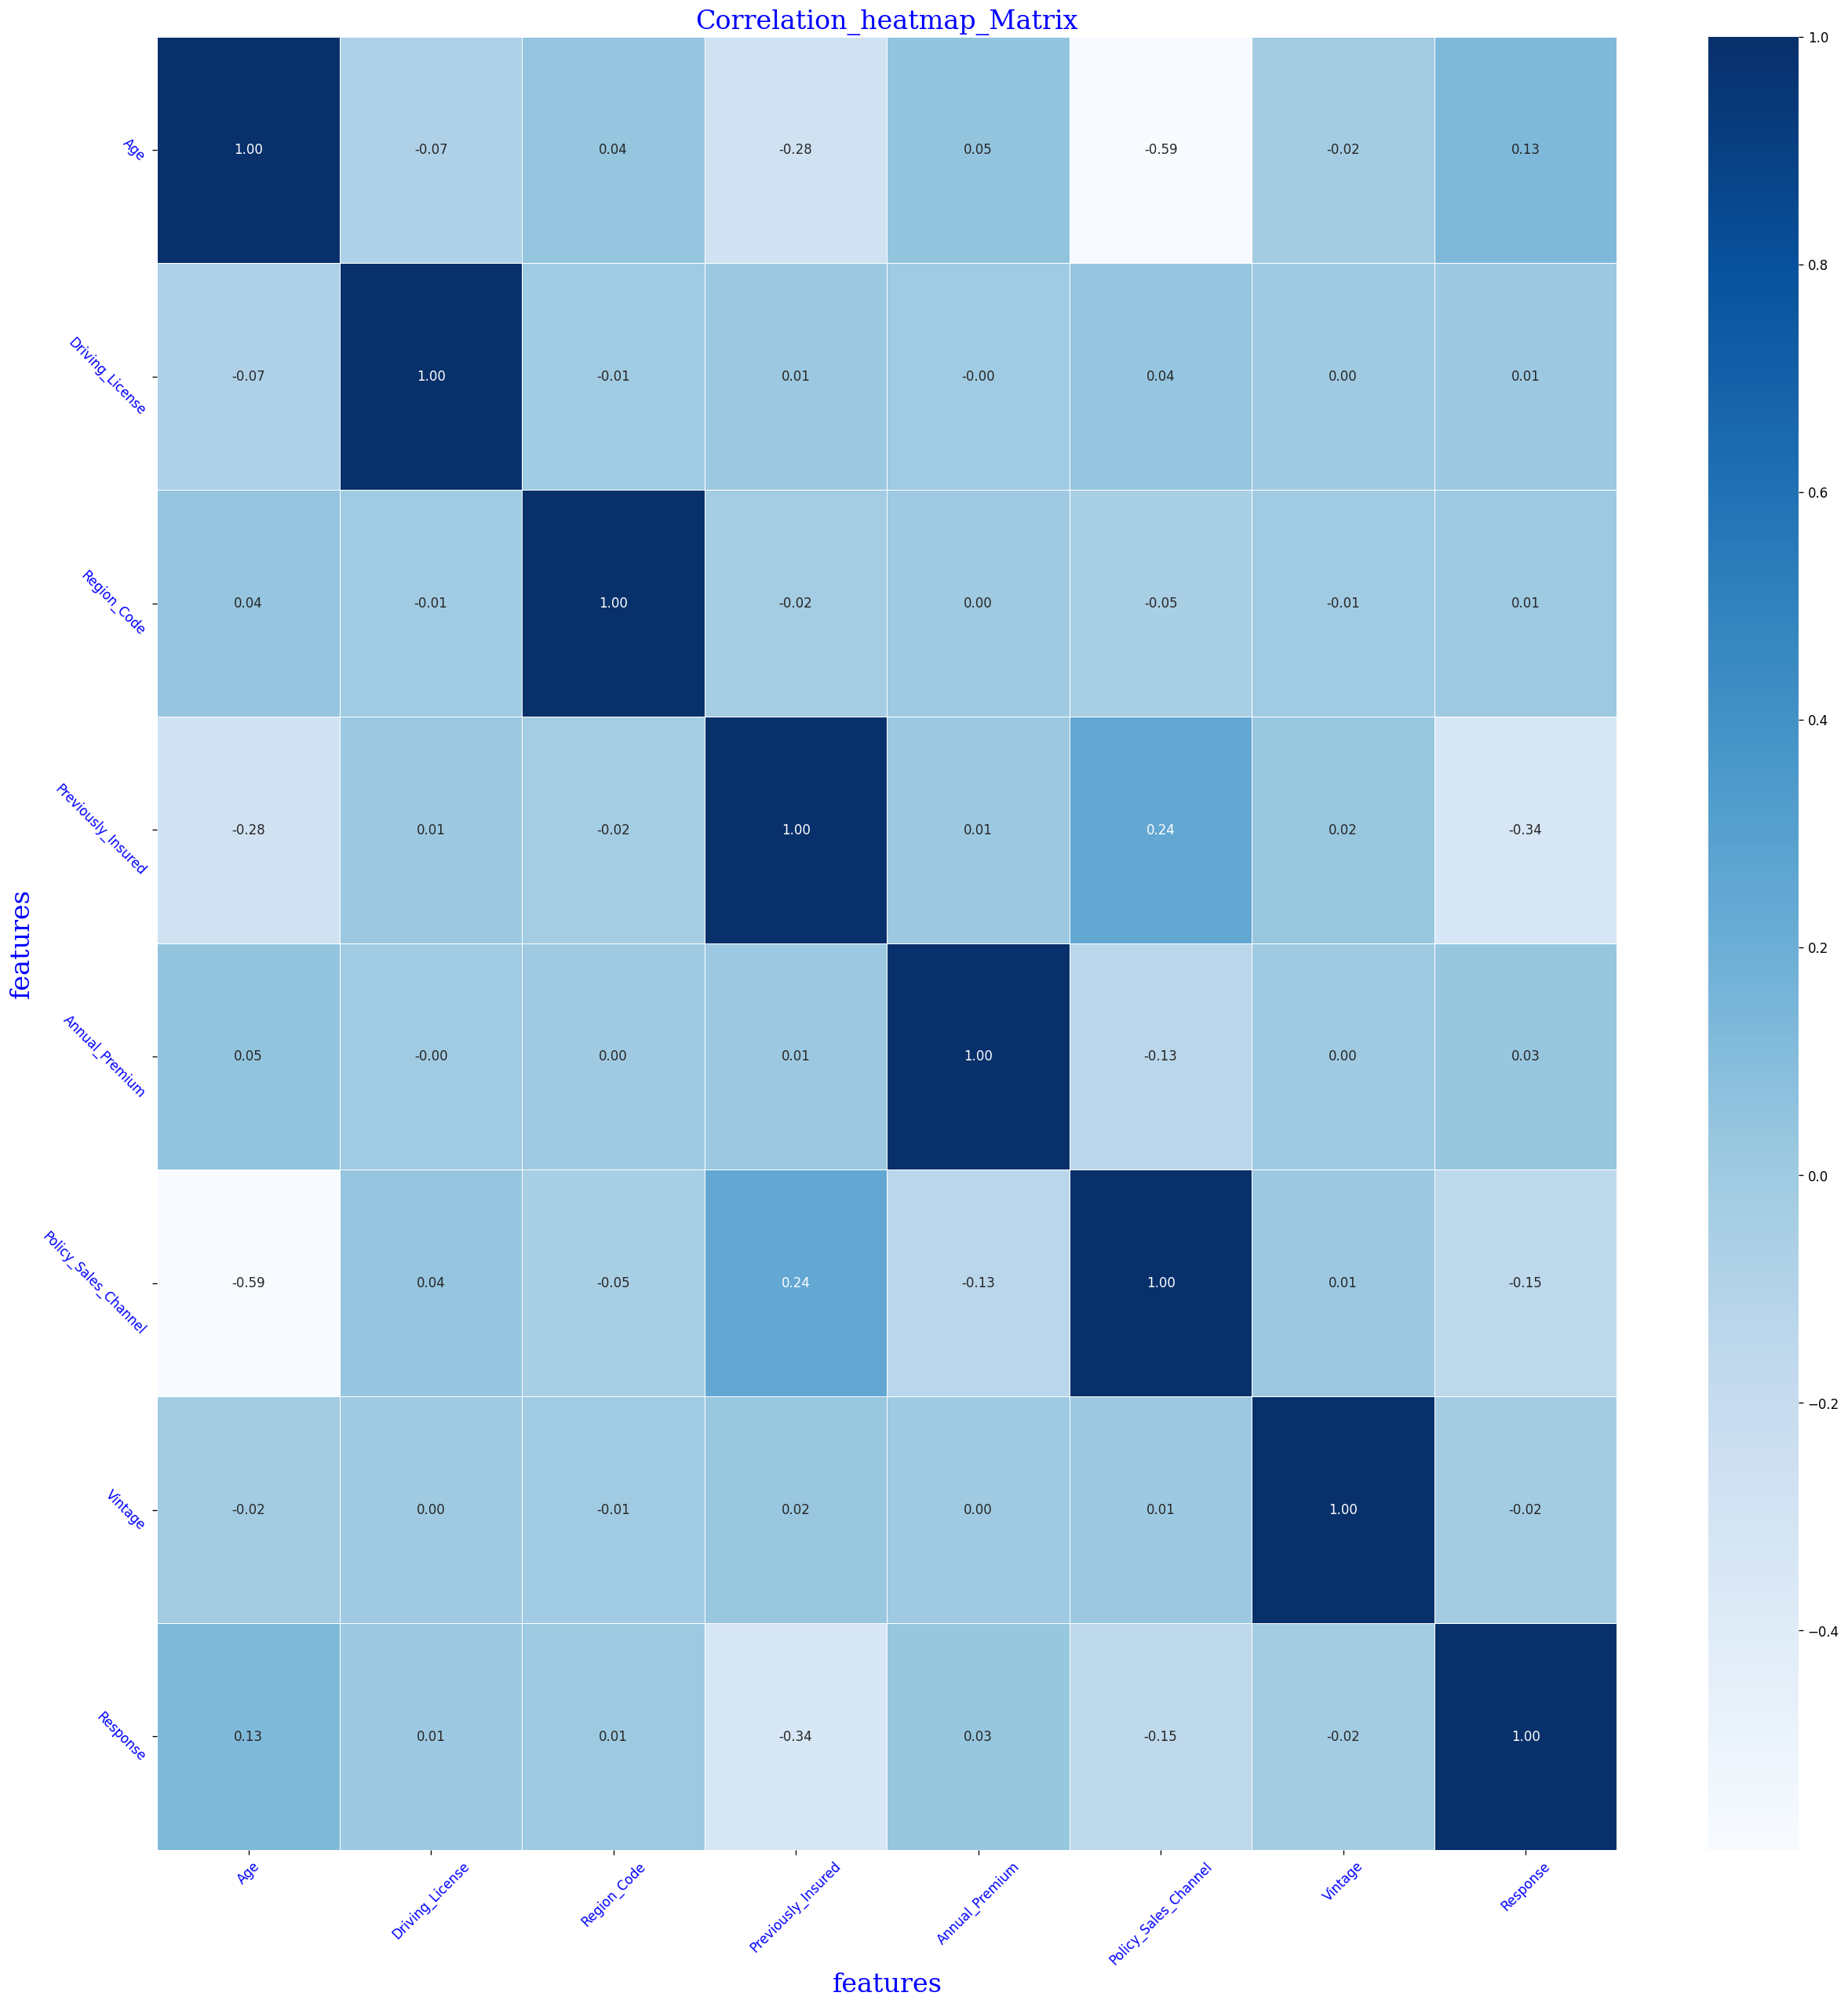

In [ ]:
# plot the heatmap:
# plot the heatmap_Correlation_MatRix:
f1={"family":"serif","size":20,"color":"b"}
plt.figure(figsize=(25,25),dpi=120)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f",cmap='Blues',linewidths=0.5)
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.xlabel("features",fontdict=f1)
plt.ylabel("features",fontdict=f1)
plt.title("Correlation_heatmap_Matrix",fontdict=f1)


In [ ]:
features=data.select_dtypes(include="number").columns

for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]:
         if ((x> upper_limit) or (x<low_limit)):
             outlier.append(x)
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")

    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

 * -- >> there No outlier in Age feature

Q1 of Age --->>> 24.0 

 Q3 of Age ---->>> 49.0 

 iqr--->>25.0

 low_limit--->>>-13.5 

  upper_limit--->>> 86.5 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

Ther outlier in this feature Driving_License

Q1 of Driving_License --->>> 1.0 

 Q3 of Driving_License ---->>> 1.0 

 iqr--->>0.0

 low_limit--->>>1.0 

  upper_limit--->>> 1.0 

 outlier---->>> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

 Number of outliers --->>> 106

-------------------------

 * -- >> there No outlier in Region_Code feature

Q1 of Region_Code --->>> 15.0 

 Q3 of Region_Code ---->>> 35.0 

 iqr--->>20.0

 low_limit--->>>-15.0 

  upper_limit--->>> 65.0 

 outli

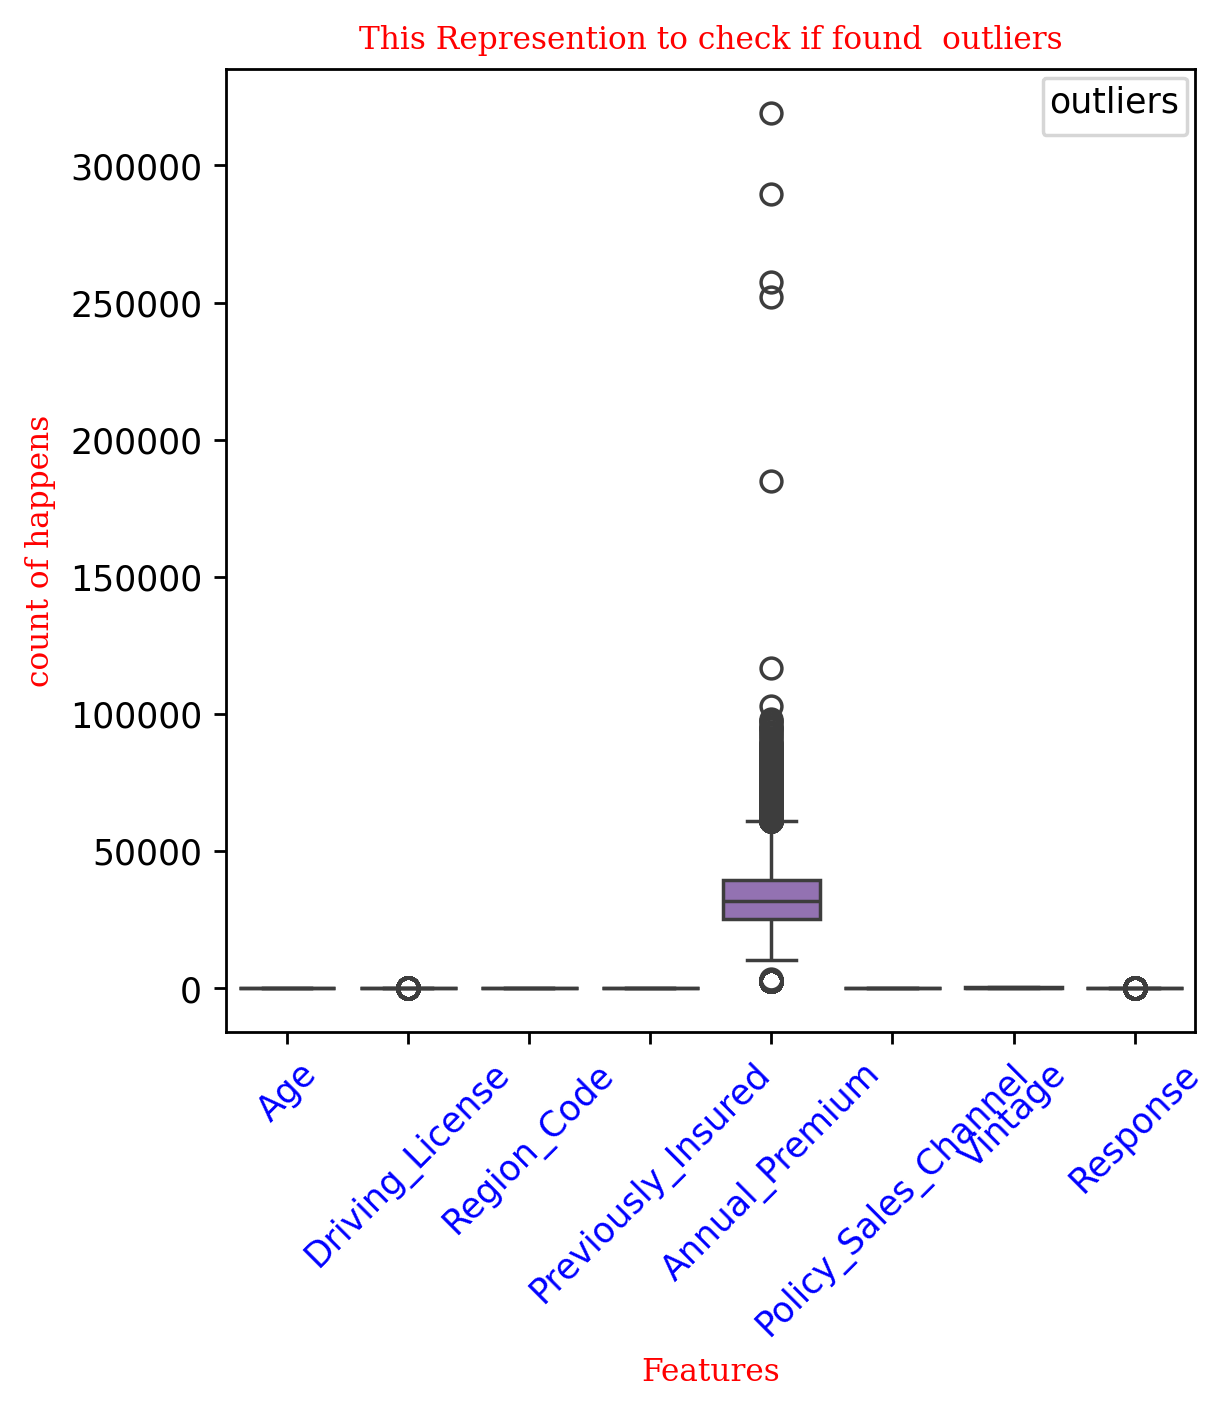

In [ ]:
# from this Represention we discover that we found outlier in the  Anematic Feature :
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(5,5),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data[features])
plt.legend(title="outliers",prop={'size': 5})

upper_limit :  1.0992100307349648

lower_limit :  -0.857290447607016

Mean Value :  0.12095979156397436

Median Value :  0.0

1st Standard Deviation :  0.3260834130569968


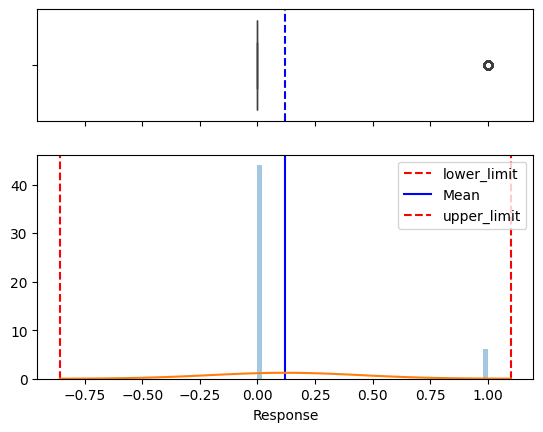

In [ ]:
#Another way to calculate outlier on Response feature:-


from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.Response.mean()
std = data.Response.std()
median = data.Response.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["Response"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["Response"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

upper_limit :  79016.25214391219

lower_limit :  -18253.56912863158

Mean Value :  30381.341507640307

Median Value :  31753.0

1st Standard Deviation :  16211.636878757296


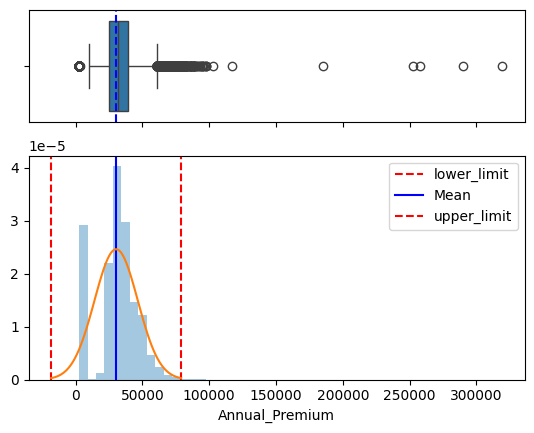

In [ ]:
#Another way to calculate outlier on Annual_Premium feature:-


from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.Annual_Premium.mean()
std = data.Annual_Premium.std()
median = data.Annual_Premium.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["Annual_Premium"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["Annual_Premium"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

upper_limit :  1.127608052219313

lower_limit :  0.8686598162406545

Mean Value :  0.9981339342299838

Median Value :  1.0

1st Standard Deviation :  0.04315803932977641


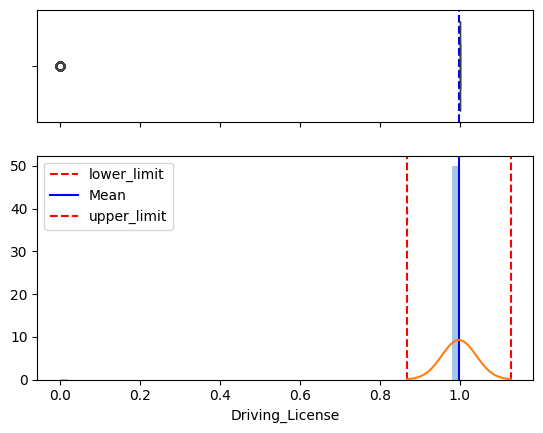

In [ ]:
#Another way to calculate outlier on Driving_License feature:-


from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.Driving_License.mean()
std = data.Driving_License.std()
median = data.Driving_License.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["Driving_License"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["Driving_License"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

##  Data processing and Training :(convert Categorical , Labelencoder,StandardScaler, split ,training data ):

In [ ]:
# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns


encoder = LabelEncoder()

encoder_feaures = data[categorical_cols].apply(encoder.fit_transform)
encoder_feaures


Gender  Vehicle_Age  Vehicle_Damage
0           1            0               1
1           1            1               1
2           0            2               0
3           0            0               1
4           0            0               0
...       ...          ...             ...
56799       0            2               1
56800       0            0               1
56801       0            2               0
56802       0            0               1
56803       1            0               1

[56804 rows x 3 columns]

In [ ]:
# Separate numerical features (excluding 'Response')
numerical_features = data.select_dtypes(include=['number']).drop('Response', axis=1)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Create a DataFrame from the scaled numerical features
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

scaled_numerical_df

Age  Driving_License  Region_Code  Previously_Insured  \
0     -1.156064         0.043238     0.661801           -0.924862   
1      0.307064         0.043238     0.124244           -0.924862   
2     -0.890041         0.043238    -0.950868            1.081242   
3     -0.224982         0.043238    -1.949187           -0.924862   
4     -0.158477         0.043238    -0.874074            1.081242   
...         ...              ...          ...                 ...   
56799 -0.956547         0.043238    -1.334837           -0.924862   
56800  0.240559         0.043238     1.813707           -0.924862   
56801 -0.823535         0.043238    -0.106137            1.081242   
56802  2.302240         0.043238    -0.950868           -0.924862   
56803  0.506582         0.043238     1.506532           -0.924862   

       Annual_Premium  Policy_Sales_Channel   Vintage  
0            2.141669              0.212926  0.284389  
1            1.759841             -1.601602  1.544748  
2            0.472607              0.731363  1.120469  
3           -1.711831              0.805426 -1.100759  
4            0.096824              0.731363  1.619621  
...               ...                   ...       ...  
56799       -0.136221              0.731363 -0.052539  
56800        1.515817             -1.934883  1.320130  
56801       -0.025990              0.731363 -0.476819  
56802       -1.711831              0.212926  0.371740  
56803        0.251035              0.212926 -2.024191  

[56804 rows x 7 columns]

In [ ]:
# Concatenate scaled numerical features and encoded categorical features
processed_data = pd.concat([scaled_numerical_df, encoder_feaures], axis=1)
processed_data

Age  Driving_License  Region_Code  Previously_Insured  \
0     -1.156064         0.043238     0.661801           -0.924862   
1      0.307064         0.043238     0.124244           -0.924862   
2     -0.890041         0.043238    -0.950868            1.081242   
3     -0.224982         0.043238    -1.949187           -0.924862   
4     -0.158477         0.043238    -0.874074            1.081242   
...         ...              ...          ...                 ...   
56799 -0.956547         0.043238    -1.334837           -0.924862   
56800  0.240559         0.043238     1.813707           -0.924862   
56801 -0.823535         0.043238    -0.106137            1.081242   
56802  2.302240         0.043238    -0.950868           -0.924862   
56803  0.506582         0.043238     1.506532           -0.924862   

       Annual_Premium  Policy_Sales_Channel   Vintage  Gender  Vehicle_Age  \
0            2.141669              0.212926  0.284389       1            0   
1            1.759841             -1.601602  1.544748       1            1   
2            0.472607              0.731363  1.120469       0            2   
3           -1.711831              0.805426 -1.100759       0            0   
4            0.096824              0.731363  1.619621       0            0   
...               ...                   ...       ...     ...          ...   
56799       -0.136221              0.731363 -0.052539       0            2   
56800        1.515817             -1.934883  1.320130       0            0   
56801       -0.025990              0.731363 -0.476819       0            2   
56802       -1.711831              0.212926  0.371740       0            0   
56803        0.251035              0.212926 -2.024191       1            0   

       Vehicle_Damage  
0                   1  
1                   1  
2                   0  
3                   1  
4                   0  
...               ...  
56799               1  
56800               1  
56801               0  
56802               1  
56803               1  

[56804 rows x 10 columns]

In [ ]:
x=processed_data
y=data["Response"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (45443, 10)

x_test shape :  (11361, 10)

y_train shape :  (45443,)

y_test shape :  (11361,)


## Bulding the models (traditional Machine learning) :

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(max_depth=5),
    "RandomForestClassifier":RandomForestClassifier(),
    "svm":svm.SVC(),
    "GaussianNB":GaussianNB()
}


In [ ]:
model_scores={}
for name,model in models.items():

    model.fit(x_train,y_train)

    y_pred=model.predict(x_test)

    model_scores[name]=[("acc",accuracy_score(y_test,y_pred)),

       ("f1_score",f1_score(y_test,y_pred)),

       ("precision_score",precision_score(y_test,y_pred)),

       ("recall_score",recall_score(y_test,y_pred)),
       ("confusion_matrix",confusion_matrix(y_test,y_pred),

      (" Mean Squared Error",mean_squared_error(y_test,y_pred))
                 )]


In [ ]:
model_scores

{'LogisticRegression': [('acc', 0.8815245136871754),
  ('f1_score', 0.0),
  ('precision_score', 0.0),
  ('recall_score', 0.0),
  ('confusion_matrix',
   array([[10015,     0],
          [ 1346,     0]]),
   (' Mean Squared Error', 0.11847548631282458))],
 'DecisionTreeClassifier': [('acc', 0.8815245136871754),
  ('f1_score', 0.0),
  ('precision_score', 0.0),
  ('recall_score', 0.0),
  ('confusion_matrix',
   array([[10015,     0],
          [ 1346,     0]]),
   (' Mean Squared Error', 0.11847548631282458))],
 'RandomForestClassifier': [('acc', 0.872106328668251),
  ('f1_score', 0.1663798049340218),
  ('precision_score', 0.36523929471032746),
  ('recall_score', 0.10772659732540862),
  ('confusion_matrix',
   array([[9763,  252],
          [1201,  145]]),
   (' Mean Squared Error', 0.12789367133174898))],
 'svm': [('acc', 0.8815245136871754),
  ('f1_score', 0.0),
  ('precision_score', 0.0),
  ('recall_score', 0.0),
  ('confusion_matrix',
   array([[10015,     0],
          [ 1346,     0]

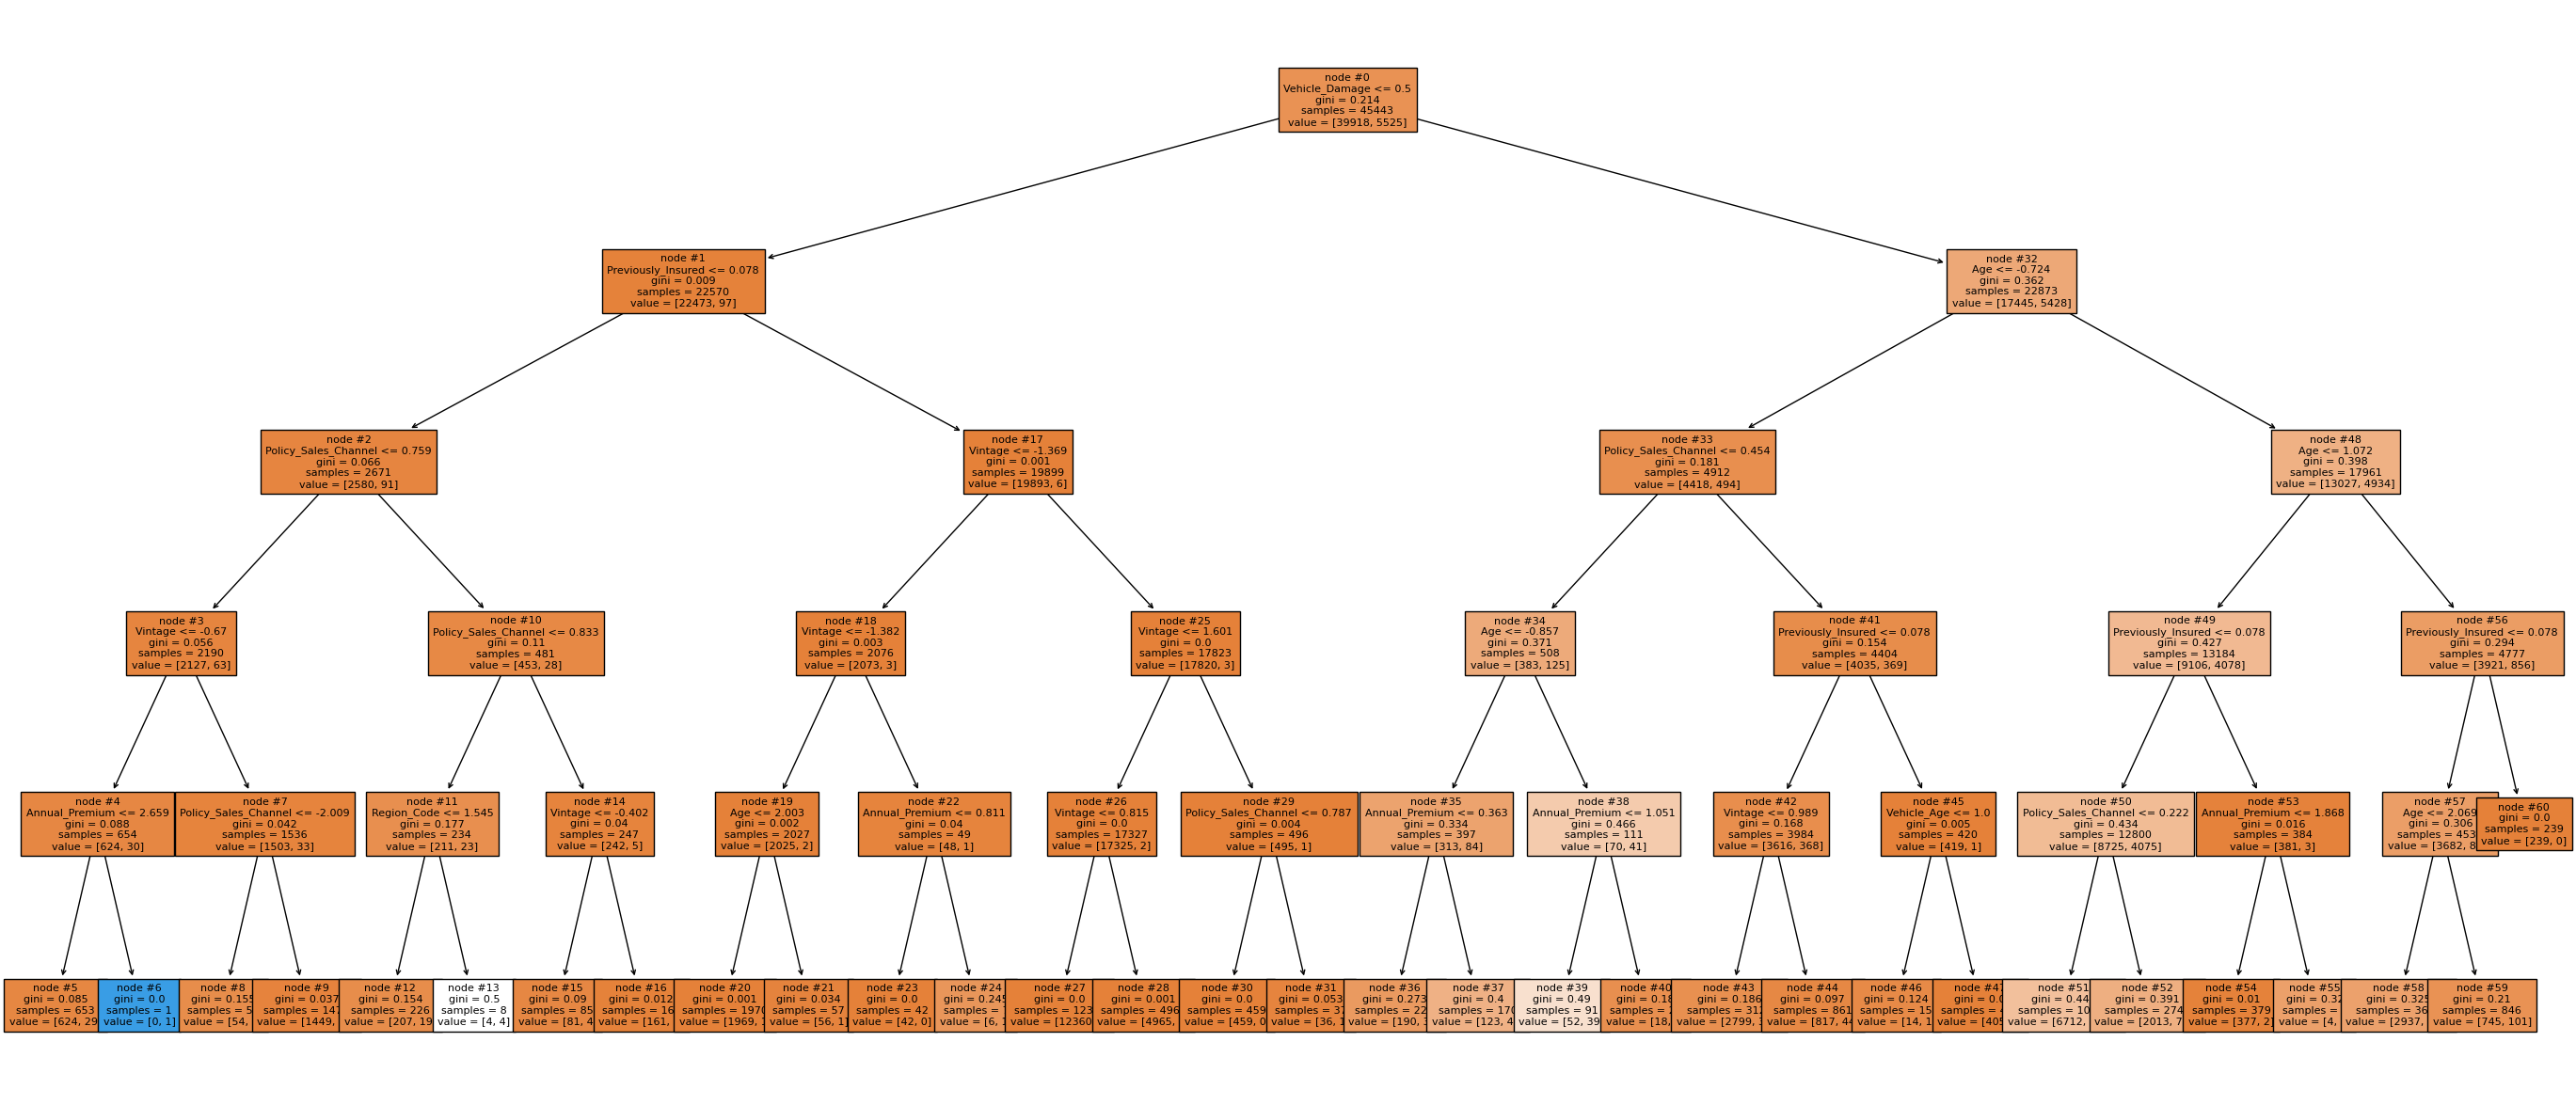

In [ ]:
decision_tree_model = models["DecisionTreeClassifier"]

plt.figure(figsize=(35, 15))  # Adjust figure size as needed
tree.plot_tree(decision_tree_model, filled=True, feature_names=x.columns, node_ids=True, fontsize=8)  # Control node size with fontsize
plt.show()


## Bulding Neural Network Sequentail model by using Tensorflow :

In [ ]:
# imports :

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2

In [ ]:
# Build Regulized model: (Sequentail Api Regulized) -->> to improve from the accuracy

model_r=Sequential([

    Input(shape=[10]),

    Dense(units=128,activation="relu",kernel_regularizer=l2(0.01)),
    Dropout(0.1),

    Dense(units=256,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.2),

    Dense(units=512,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.3),

    Dense(units=256,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.2),

    Dense(units=1,activation="sigmoid",kernel_regularizer=l2(.01)),


                ])
model_r


In [ ]:
#compile:
model_r.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
  )

In [ ]:
history=model_r.fit(x_train,y_train,epochs=20,batch_size=35,validation_split=0.1,)
history

Epoch 1/20

1169/1169 [==============================] - 13s 6ms/step - loss: 0.5966 - accuracy: 0.8779 - val_loss: 0.3459 - val_accuracy: 0.8799

Epoch 2/20

1169/1169 [==============================] - 6s 5ms/step - loss: 0.3438 - accuracy: 0.8783 - val_loss: 0.3412 - val_accuracy: 0.8799

Epoch 3/20

1169/1169 [==============================] - 7s 6ms/step - loss: 0.3435 - accuracy: 0.8783 - val_loss: 0.3396 - val_accuracy: 0.8799

Epoch 4/20

1169/1169 [==============================] - 6s 5ms/step - loss: 0.3427 - accuracy: 0.8783 - val_loss: 0.3379 - val_accuracy: 0.8799

Epoch 5/20

1169/1169 [==============================] - 7s 6ms/step - loss: 0.3428 - accuracy: 0.8783 - val_loss: 0.3400 - val_accuracy: 0.8799

Epoch 6/20

1169/1169 [==============================] - 7s 6ms/step - loss: 0.3427 - accuracy: 0.8783 - val_loss: 0.3462 - val_accuracy: 0.8799

Epoch 7/20

1169/1169 [==============================] - 8s 6ms/step - loss: 0.3431 - accuracy: 0.8783 - val_loss: 0.3404 -

In [ ]:
# predict on the model:
y_p=model_r.predict(x_test)
y_p[:10]

356/356 [==============================] - 1s 3ms/step


array([[0.01091877],
       [0.22228397],
       [0.15984584],
       [0.28060442],
       [0.24818231],
       [0.09470665],
       [0.00251046],
       [0.22981788],
       [0.00701138],
       [0.00244264]], dtype=float32)

In [ ]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_p)} \n the max_value for prediction --->>> {np.max(y_p)} ")

the min_value for prediction --->> 0.0021162854973226786 

 the max_value for prediction --->>> 0.29255107045173645 


In [ ]:
#Evalute the score:
model_r.evaluate(x_test,y_test,verbose=2)

356/356 - 1s - loss: 0.3402 - accuracy: 0.8815 - 776ms/epoch - 2ms/step


[0.34024766087532043, 0.8815245032310486]

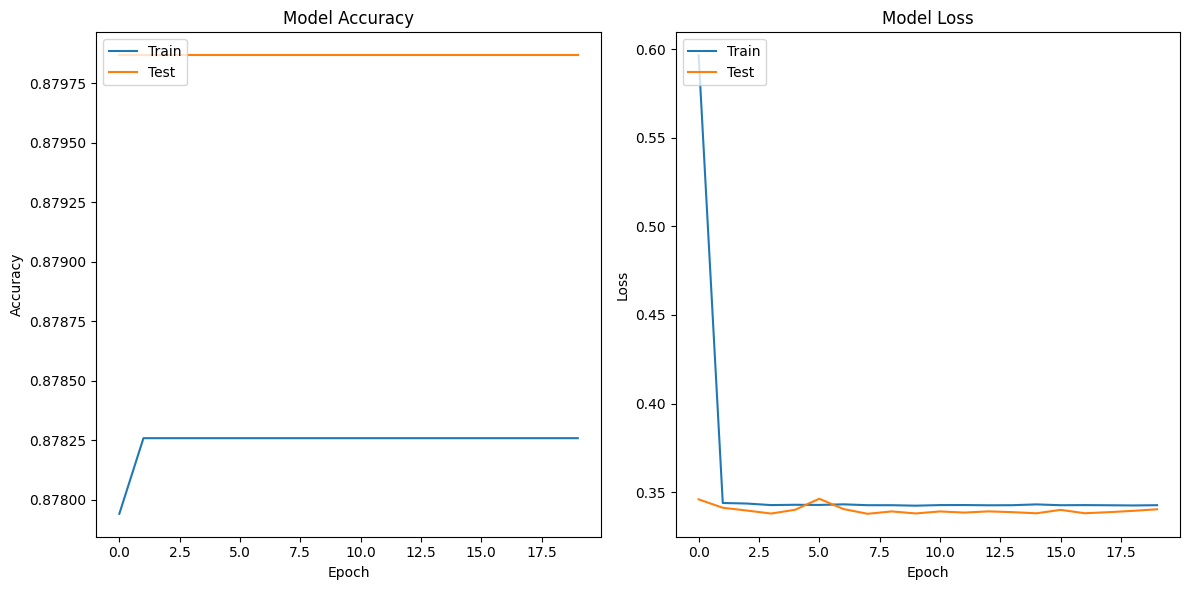

In [ ]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Results :
   
   * Model : LogisticRegression
   
   * Mean Squared Error (MSE): 0.11847548631282458
   
   * model_accuracy: 88 %
--------------------------------------------------
   * Model: DecisionTreeClassifier
   
   * Mean Squared Error (MSE):0.11847548631282458
   
   * model_accuracy: 88 %
--------------------------------------------------

   * Model: RandomForestClassifier
   
   * Mean Squared Error (MSE) : 0.12789367133174898
   
   * model_accuracy: 87 %
--------------------------------------------------

  * Model : Support Vector Machine  
  
  * Mean Squared Error (MSE): 0.11847548631282458
  
  * model_accuracy:88 %
--------------------------------------------------


  * Model:GaussianNB
  
  * Mean Squared Error (MSE):0.3683654607869026
  
  * model_accuracy: 63 %
--------------------------------------------------
  * Model: Neural Network Sequential (Tensorflow)
  
  * Mean Squared Error (MSE):0.3402
  
  * model_accuracy: 88%

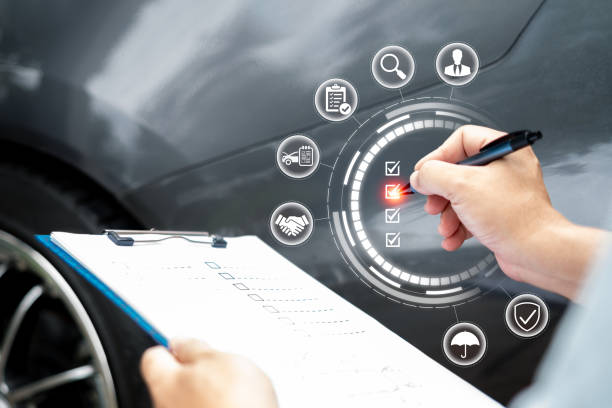

In [ ]:
# image6 :
img6=Image("insurance6.jpg")
display(img6)

In [ ]:
# Save the model :

from joblib import dump, load

# Save the model
dump(model_r, 'model.joblib')

# Load the model
model = load('model.joblib')

## Finally :

* All thanks to our team :

  * 1- AbdalRahman Gameel Hebishy (* DataScientist&Machinelearning Engineer) -->>  https://www.kaggle.com/abdalrhamnhebishy
  -->> https://github.com/AbdalRahmna/DataScience-Projects
  
  * 2- Fares Yasser Sayed (* front end Developer) -->> https://www.kaggle.com/f2resyasser

  * 3-Esraa Mosaad zaky Abdelrazek(*DataScientist & MachinelearningEngineer)

     --->>> https://github.com/EsraaMosaad?tab=repositories
  